# Imports

In [1]:
# Add parent directory to path to import gptransform
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.pardir))
sys.path.insert(0, parent_dir)
import gptransform

# Math libraries
import time
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torch.distributions.multivariate_normal import  MultivariateNormal

# Plotting
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes, mark_inset
from matplotlib.ticker import ScalarFormatter
from matplotlib.colors import Normalize
import string
import pandas as pd

# Run in float64 to help with numerical stability
# very crucial, remove with caution
torch.set_default_dtype(torch.float64)

import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 15

# Set up the data

/var/folders/tv/1d811xv917v4wz50x1bqpvcc0000gn/T/ipykernel_41387/2875655339.py:15: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  r = torch.tensor(r).to(torch.float64)
/var/folders/tv/1d811xv917v4wz50x1bqpvcc0000gn/T/ipykernel_41387/2875655339.py:16: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  gr = torch.tensor(gr).to(torch.float64)


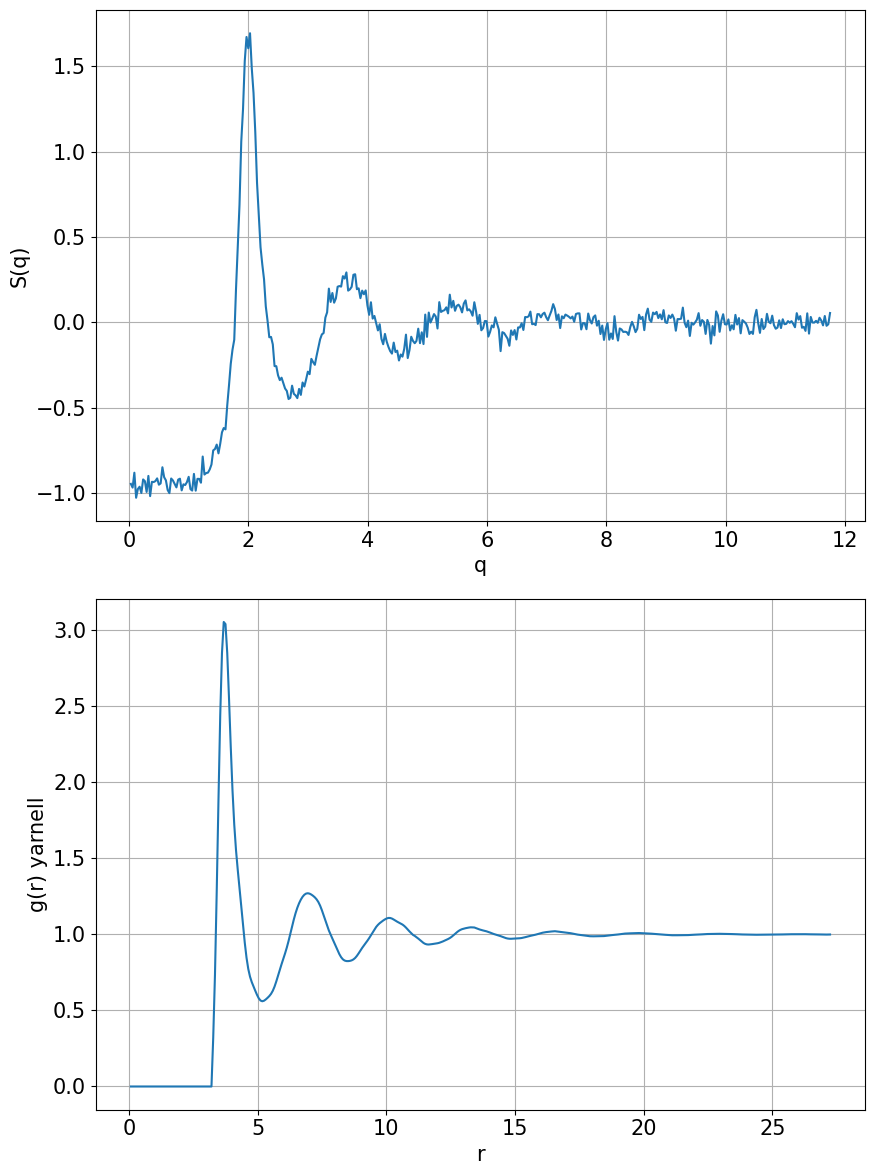

In [2]:
density = 0.02125

my_data = np.genfromtxt("Yarnell_Sq_Ar_1973.csv", delimiter=',')
q_train = torch.unsqueeze(torch.tensor(my_data.T[0]),dim=1)[1:].float()
sq_train = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float() - 1 + torch.normal(0, 0.04, size=q_train.size())

sq_reported = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float() - 1

my_data = np.genfromtxt("Yarnell_gr_Ar_1973.csv", delimiter=',')
r_reported = torch.unsqueeze(torch.tensor(my_data.T[0]),dim=1)[1:].float()
gr_reported = torch.unsqueeze(torch.tensor(my_data.T[1]),dim=1)[1:].float()

r,gr = r_reported, gr_reported

r = torch.tensor(r).to(torch.float64)
gr = torch.tensor(gr).to(torch.float64)

q = q_train
# Get noisless partial S(q)
partial_sq = sq_train

r_grid = torch.linspace(0.01, 25  , 1000).reshape(-1,1)
q_values = q

# This allows you to mix up the data so its not ordered by q
perm = torch.randperm(len(partial_sq)).unsqueeze(dim=0)

# Put into Pytorch Dataloader
# Change the reshape command to get different batch sizes, not needed here as there is not enough observations
# so we can do full gradient descent on the LMLH. 
dataset = gptransform.data(q_values[perm].reshape(1,400,1),partial_sq[perm].reshape(1,400,1))

fig, axs = plt.subplots(2, 1, figsize=(9, 12), sharex=False)

axs[0].plot(q, partial_sq)
axs[0].set_xlabel('q')
axs[0].set_ylabel('S(q)')
axs[0].grid(True)

axs[1].plot(r, gr, label='g(r)')
axs[1].set_xlabel('r')
axs[1].set_ylabel('g(r) yarnell')
axs[1].grid(True)
plt.tight_layout()
plt.show()

# Just save these for later
q_infer = q_values
r_infer = r_grid
temp = 85

# Run the optimization

Average loss: -101.239031  [    0/  750]
l:       1.294000 
max:     0.805155 
slope:   25.174749 
loc:     3.263750 
decay:   0.522625 
sigma_n: 0.248800 
r_0:     3.263750 
s:       25.174749 
Minutes Taken Since Last Report: 0.109974 



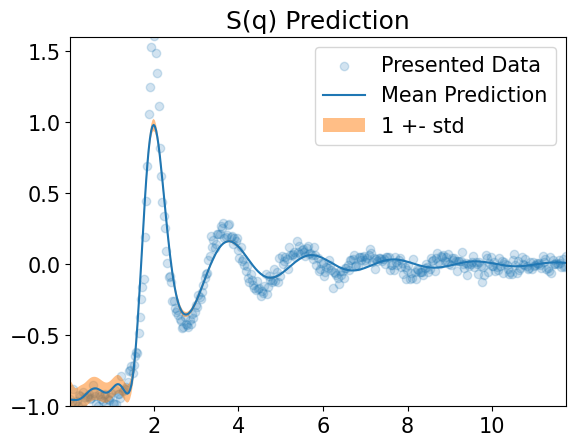

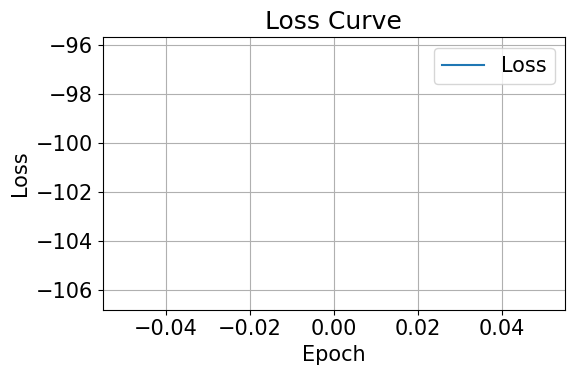

Average loss: -162.456280  [   25/  750]
l:       1.153545 
max:     0.943608 
slope:   25.782700 
loc:     3.451015 
decay:   0.465430 
sigma_n: 0.217171 
r_0:     3.402311 
s:       25.297941 
Minutes Taken Since Last Report: 1.803568 



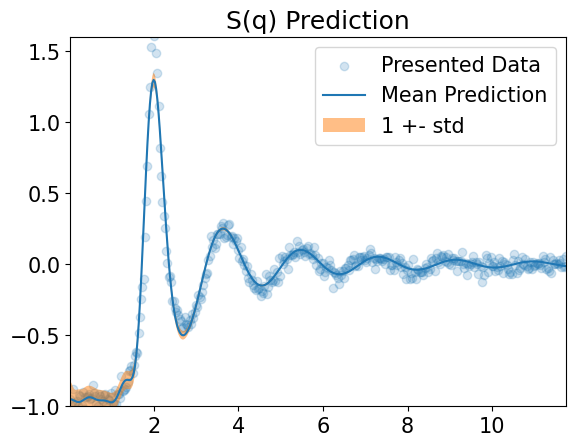

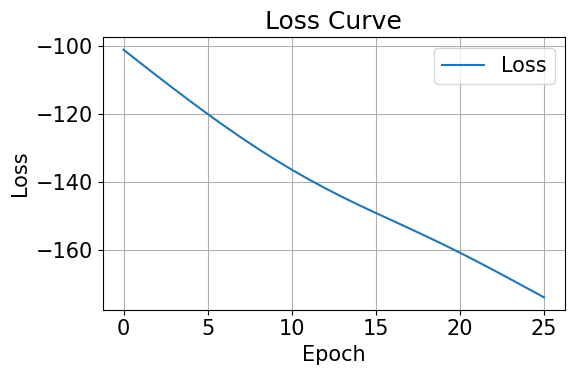

Average loss: -227.413087  [   50/  750]
l:       1.040793 
max:     1.076136 
slope:   25.254225 
loc:     3.470801 
decay:   0.414844 
sigma_n: 0.185254 
r_0:     3.327991 
s:       24.123626 
Minutes Taken Since Last Report: 1.951967 



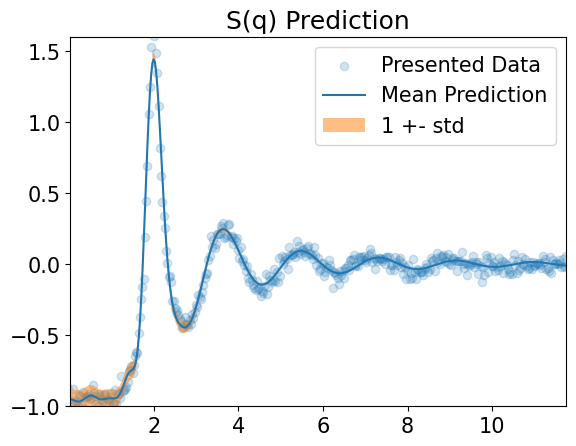

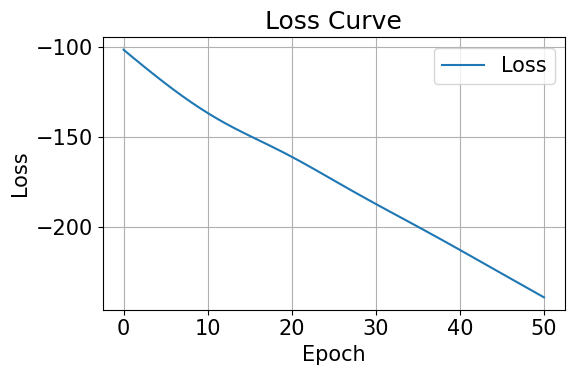

Average loss: -294.518451  [   75/  750]
l:       0.963673 
max:     1.174828 
slope:   26.729331 
loc:     3.498041 
decay:   0.384579 
sigma_n: 0.154343 
r_0:     3.284112 
s:       24.618654 
Minutes Taken Since Last Report: 1.861057 



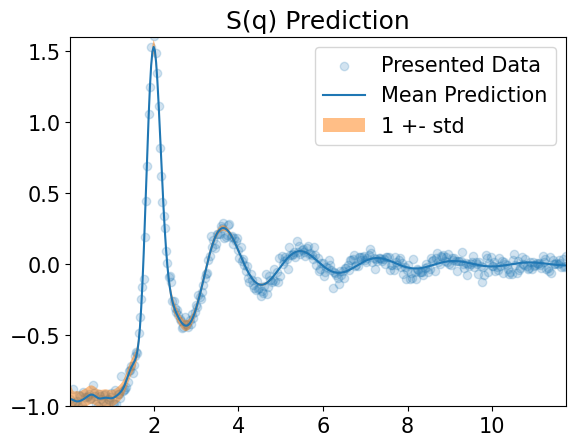

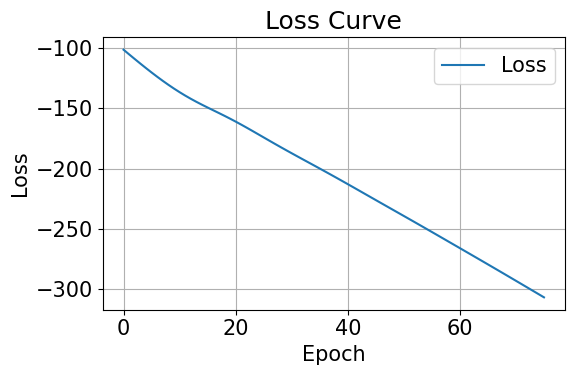

Average loss: -364.505652  [  100/  750]
l:       0.918077 
max:     1.236551 
slope:   28.179062 
loc:     3.501706 
decay:   0.377639 
sigma_n: 0.126098 
r_0:     3.283428 
s:       24.942511 
Minutes Taken Since Last Report: 2.273431 



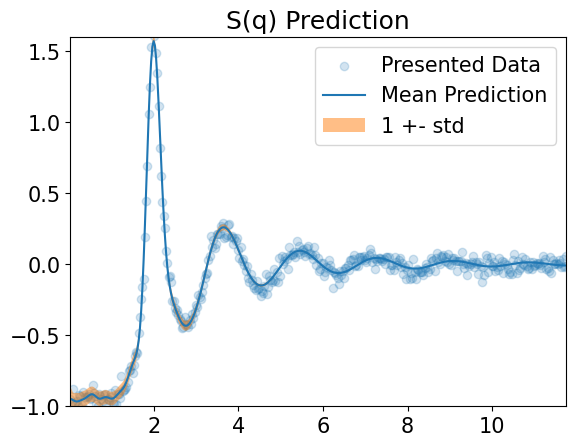

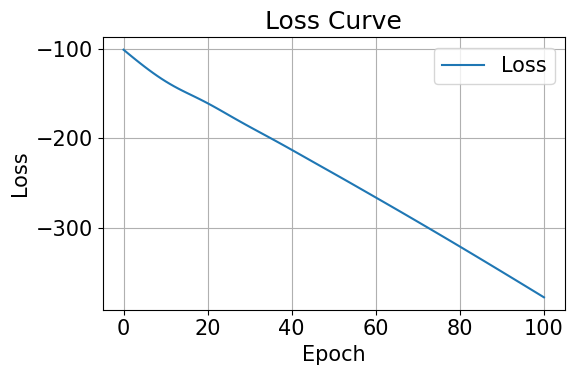

Average loss: -435.869854  [  125/  750]
l:       0.888711 
max:     1.282485 
slope:   28.462537 
loc:     3.511138 
decay:   0.376848 
sigma_n: 0.101680 
r_0:     3.279411 
s:       24.577473 
Minutes Taken Since Last Report: 1.812684 



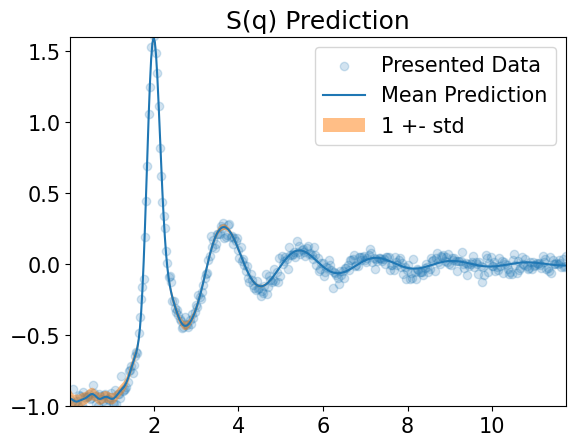

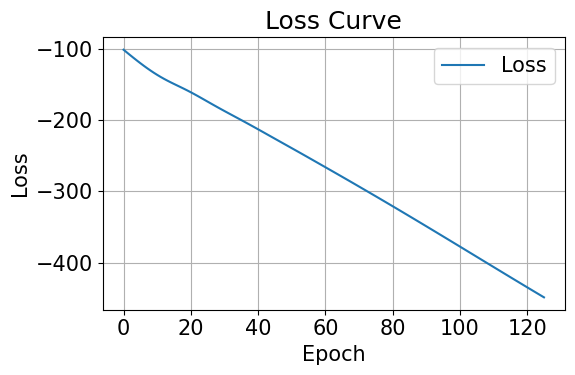

Average loss: -504.127849  [  150/  750]
l:       0.869719 
max:     1.324148 
slope:   28.506727 
loc:     3.517275 
decay:   0.372103 
sigma_n: 0.081623 
r_0:     3.277129 
s:       24.831649 
Minutes Taken Since Last Report: 1.662906 



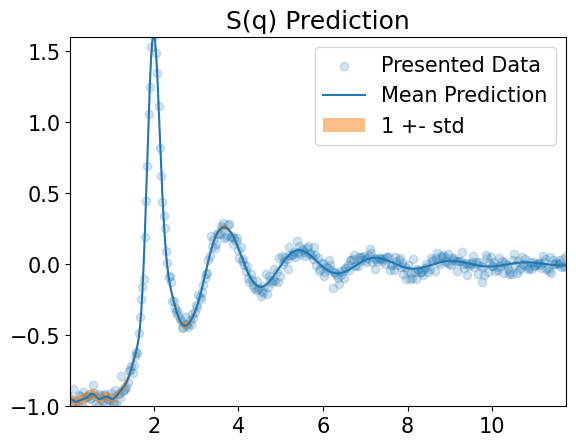

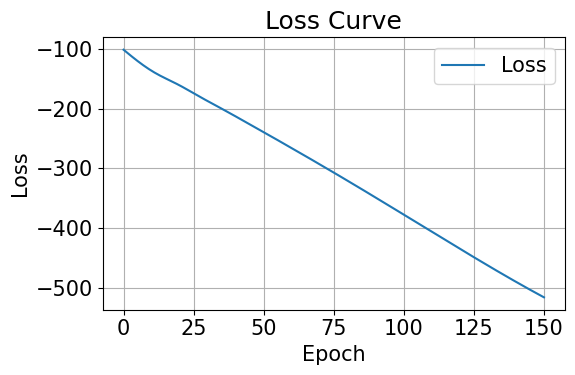

Average loss: -563.346590  [  175/  750]
l:       0.863647 
max:     1.357769 
slope:   28.429117 
loc:     3.522053 
decay:   0.365050 
sigma_n: 0.066001 
r_0:     3.275497 
s:       25.064613 
Minutes Taken Since Last Report: 2.033497 



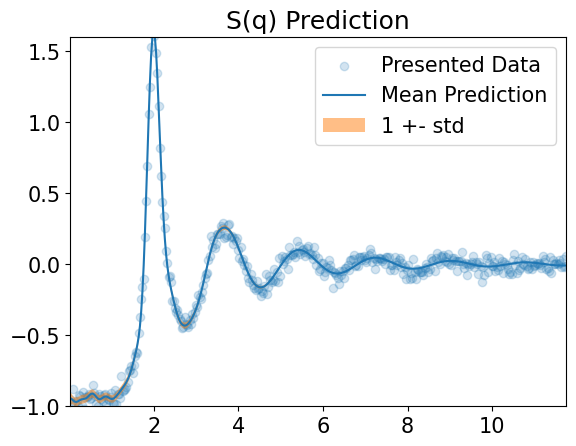

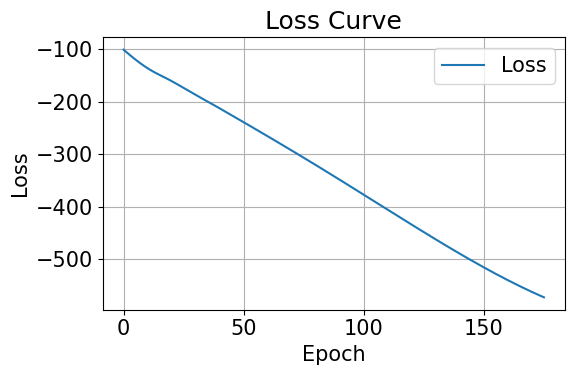

Average loss: -607.570451  [  200/  750]
l:       0.871430 
max:     1.381913 
slope:   28.137173 
loc:     3.525694 
decay:   0.356754 
sigma_n: 0.054597 
r_0:     3.274375 
s:       25.467663 
Minutes Taken Since Last Report: 2.076801 



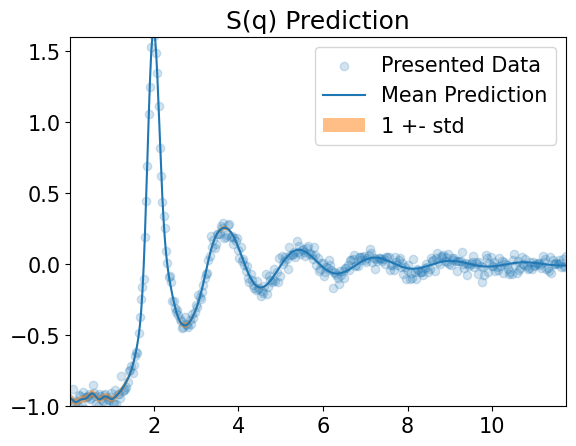

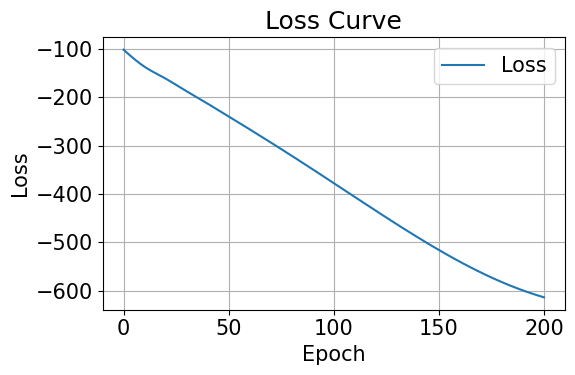

Average loss: -633.832129  [  225/  750]
l:       0.889649 
max:     1.398592 
slope:   27.675226 
loc:     3.528419 
decay:   0.348641 
sigma_n: 0.046990 
r_0:     3.273790 
s:       25.879739 
Minutes Taken Since Last Report: 2.052598 



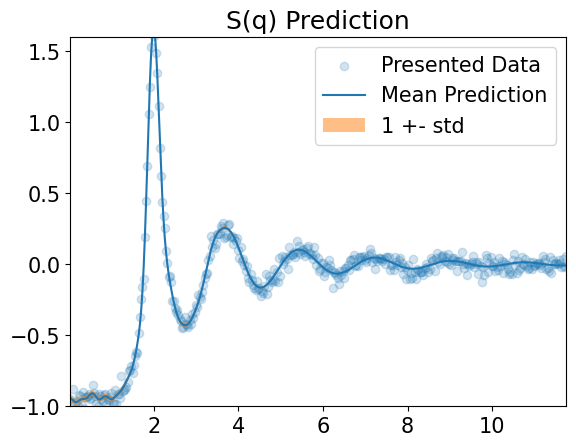

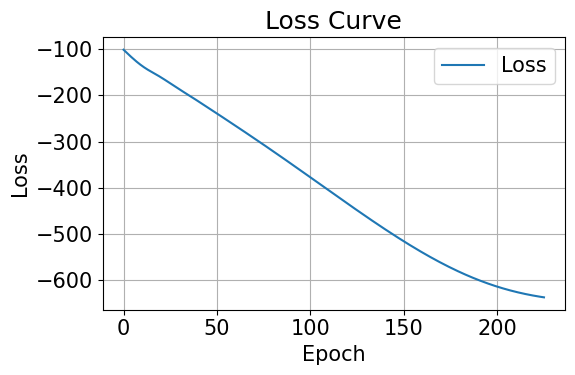

Average loss: -645.039483  [  250/  750]
l:       0.911239 
max:     1.412075 
slope:   27.210328 
loc:     3.530280 
decay:   0.342540 
sigma_n: 0.042544 
r_0:     3.273605 
s:       26.193528 
Minutes Taken Since Last Report: 1.772487 



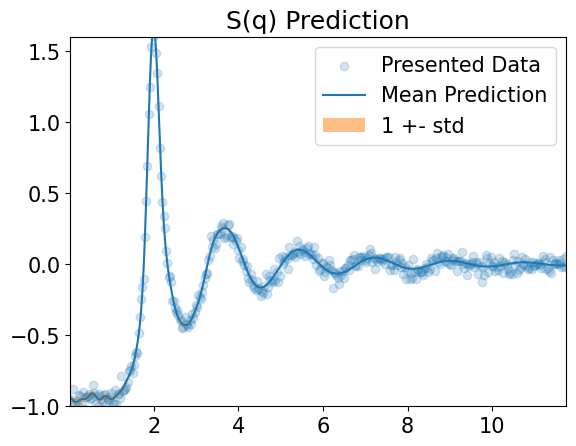

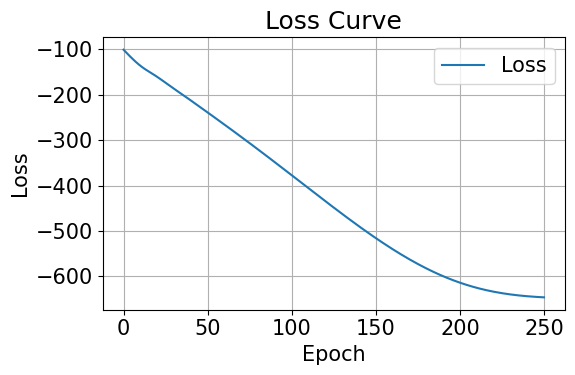

Average loss: -648.186432  [  275/  750]
l:       0.929273 
max:     1.426580 
slope:   26.902332 
loc:     3.531382 
decay:   0.339039 
sigma_n: 0.040386 
r_0:     3.273571 
s:       26.369028 
Minutes Taken Since Last Report: 1.607854 



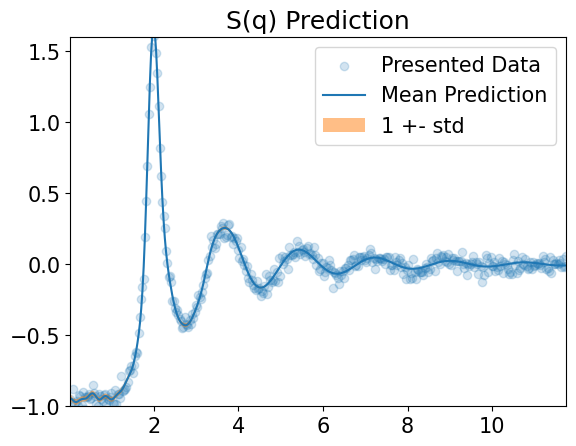

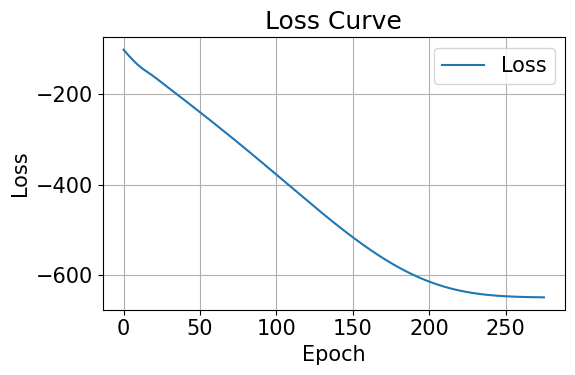

Average loss: -648.766053  [  300/  750]
l:       0.941020 
max:     1.443352 
slope:   26.744439 
loc:     3.531979 
decay:   0.337677 
sigma_n: 0.039562 
r_0:     3.273553 
s:       26.453448 
Minutes Taken Since Last Report: 1.835353 



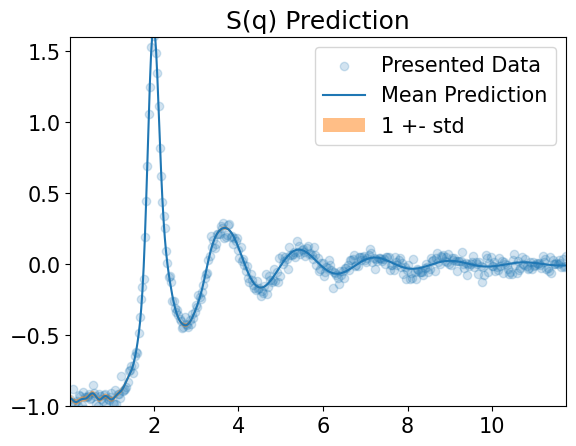

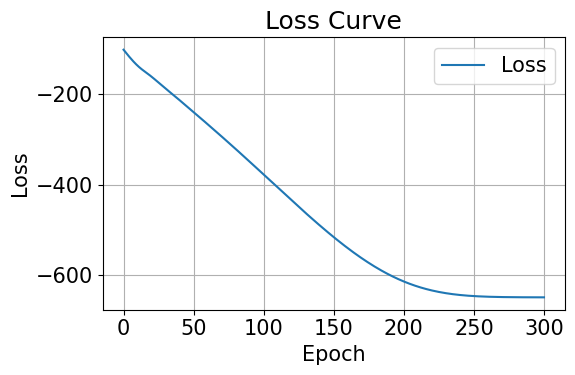

Average loss: -648.854262  [  325/  750]
l:       0.947767 
max:     1.461213 
slope:   26.650670 
loc:     3.532331 
decay:   0.337562 
sigma_n: 0.039326 
r_0:     3.273547 
s:       26.491557 
Minutes Taken Since Last Report: 1.620937 



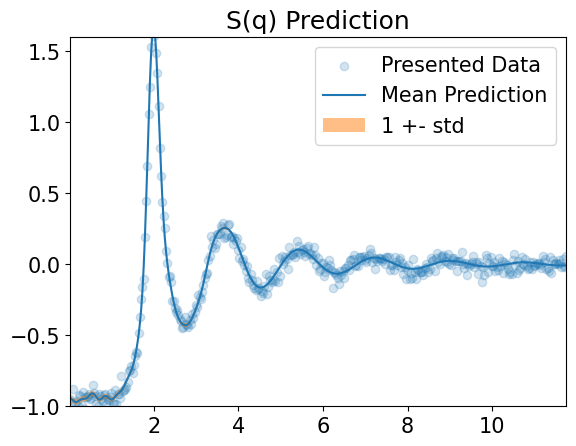

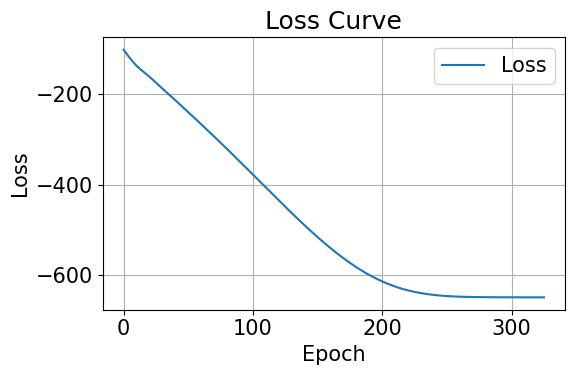

Average loss: -648.874193  [  350/  750]
l:       0.951844 
max:     1.478627 
slope:   26.575324 
loc:     3.532589 
decay:   0.337943 
sigma_n: 0.039279 
r_0:     3.273550 
s:       26.512172 
Minutes Taken Since Last Report: 1.619658 



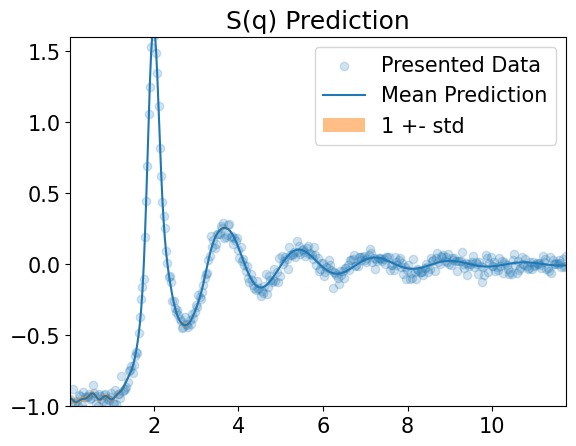

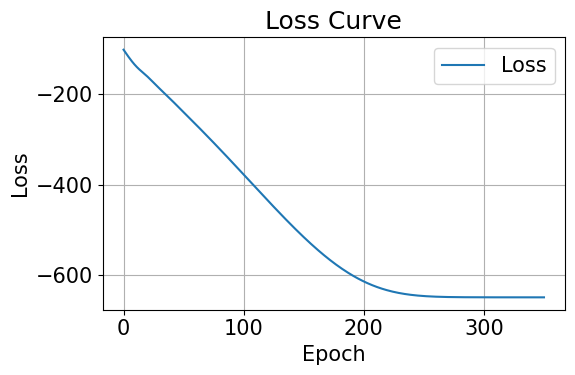

Average loss: -648.883386  [  375/  750]
l:       0.954794 
max:     1.494703 
slope:   26.507190 
loc:     3.532808 
decay:   0.338427 
sigma_n: 0.039271 
r_0:     3.273558 
s:       26.527413 
Minutes Taken Since Last Report: 1.576139 



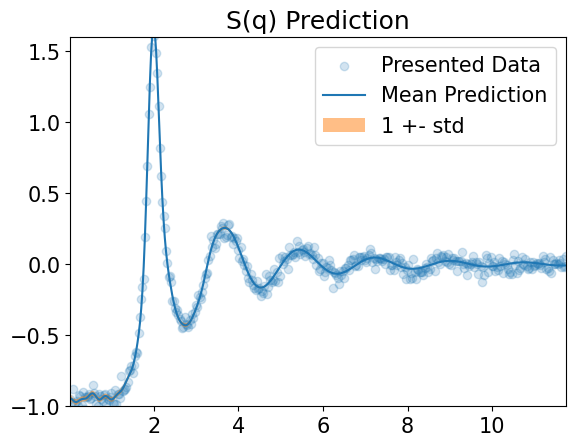

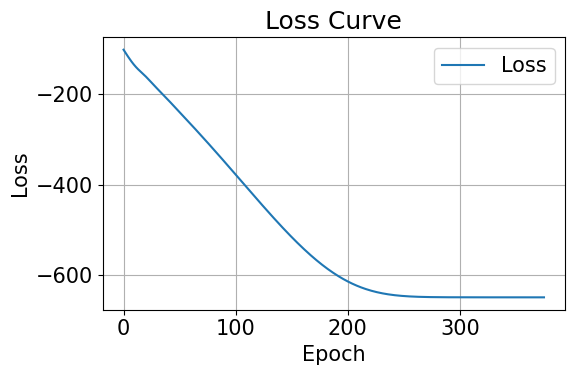

Average loss: -648.889954  [  400/  750]
l:       0.957265 
max:     1.509151 
slope:   26.445627 
loc:     3.533001 
decay:   0.338880 
sigma_n: 0.039264 
r_0:     3.273568 
s:       26.540472 
Minutes Taken Since Last Report: 1.691327 



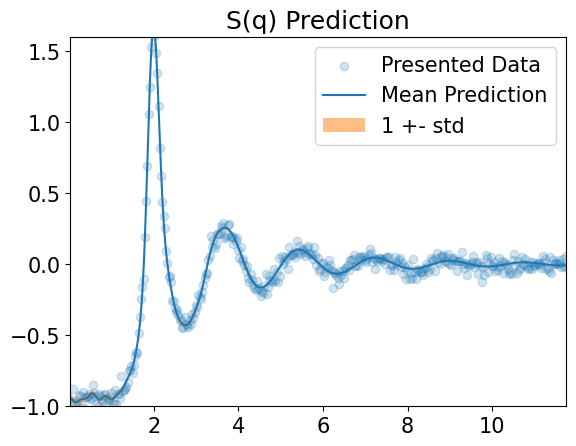

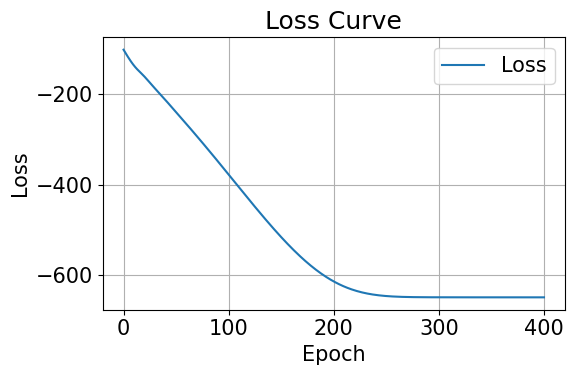

Average loss: -648.895155  [  425/  750]
l:       0.959435 
max:     1.521979 
slope:   26.391118 
loc:     3.533172 
decay:   0.339275 
sigma_n: 0.039255 
r_0:     3.273577 
s:       26.551930 
Minutes Taken Since Last Report: 1.782009 



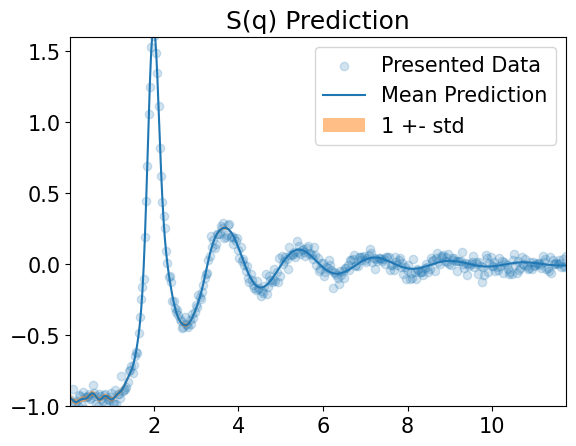

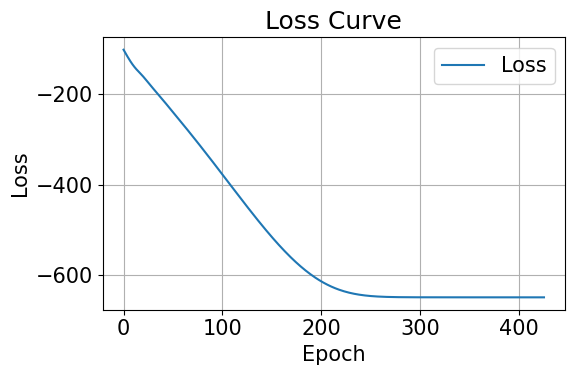

Average loss: -648.899195  [  450/  750]
l:       0.961343 
max:     1.533293 
slope:   26.343400 
loc:     3.533321 
decay:   0.339617 
sigma_n: 0.039247 
r_0:     3.273586 
s:       26.561890 
Minutes Taken Since Last Report: 1.577015 



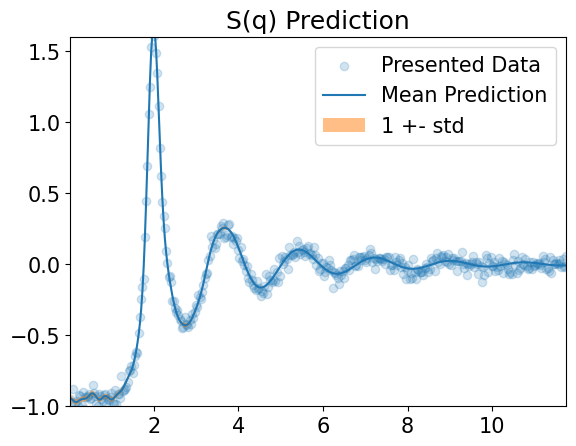

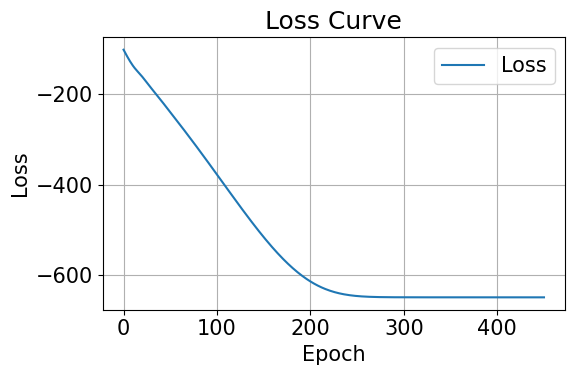

Average loss: -648.902259  [  475/  750]
l:       0.963003 
max:     1.543215 
slope:   26.301861 
loc:     3.533451 
decay:   0.339915 
sigma_n: 0.039239 
r_0:     3.273594 
s:       26.570480 
Minutes Taken Since Last Report: 1.658579 



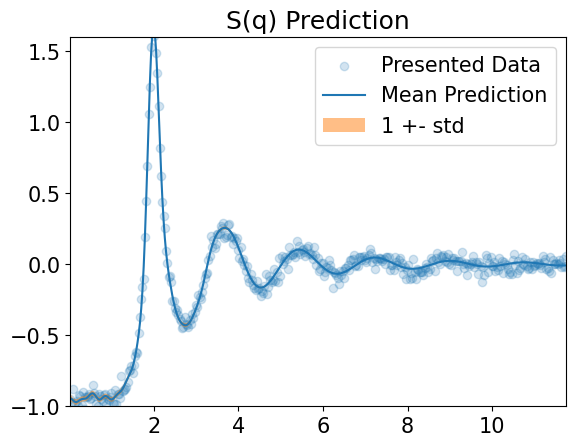

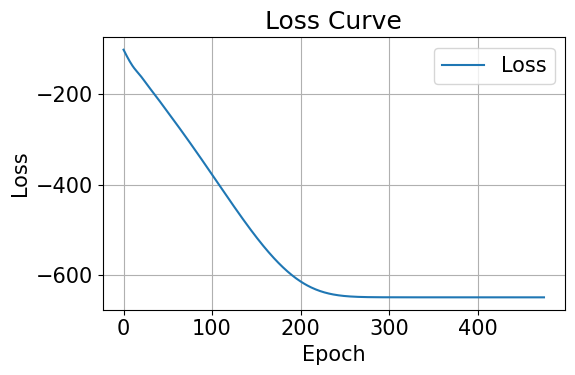

Average loss: -648.904566  [  500/  750]
l:       0.964438 
max:     1.551863 
slope:   26.265851 
loc:     3.533563 
decay:   0.340172 
sigma_n: 0.039232 
r_0:     3.273601 
s:       26.577859 
Minutes Taken Since Last Report: 1.605894 



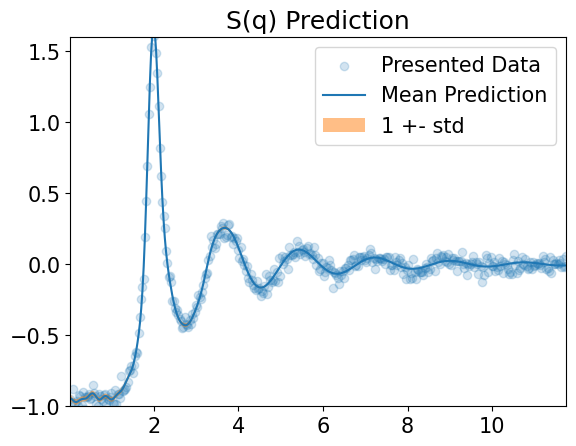

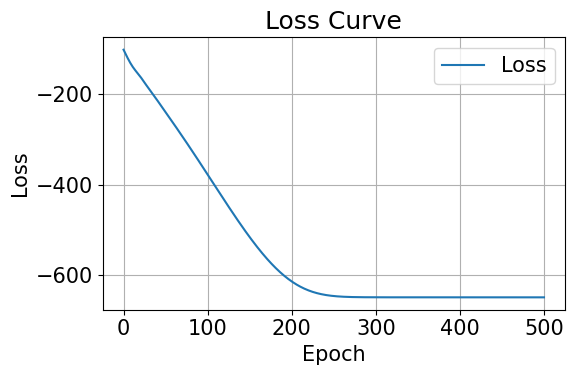

Average loss: -648.906306  [  525/  750]
l:       0.965671 
max:     1.559356 
slope:   26.234775 
loc:     3.533660 
decay:   0.340393 
sigma_n: 0.039225 
r_0:     3.273607 
s:       26.584183 
Minutes Taken Since Last Report: 1.530320 



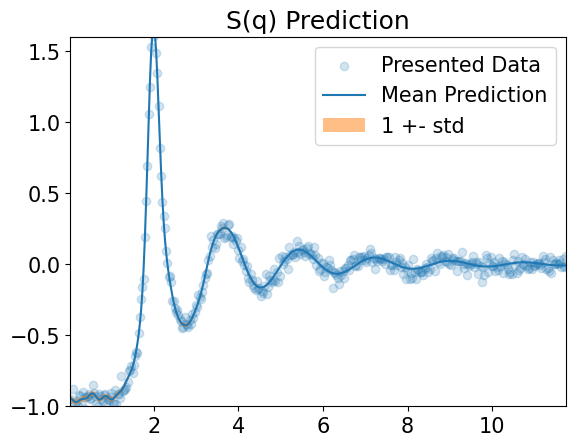

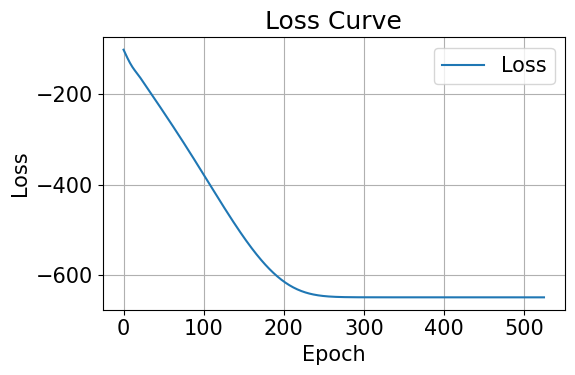

Average loss: -648.907624  [  550/  750]
l:       0.966725 
max:     1.565806 
slope:   26.208088 
loc:     3.533743 
decay:   0.340582 
sigma_n: 0.039219 
r_0:     3.273613 
s:       26.589589 
Minutes Taken Since Last Report: 1.498812 



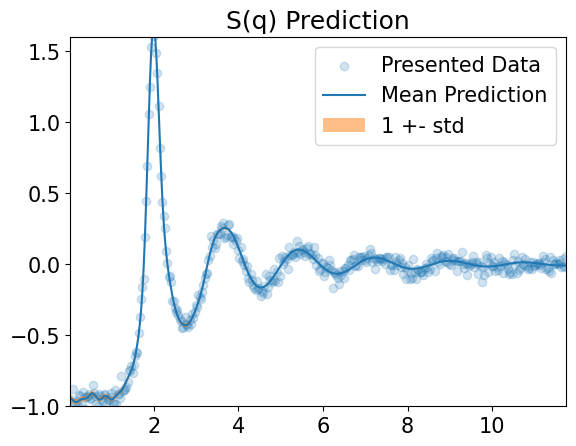

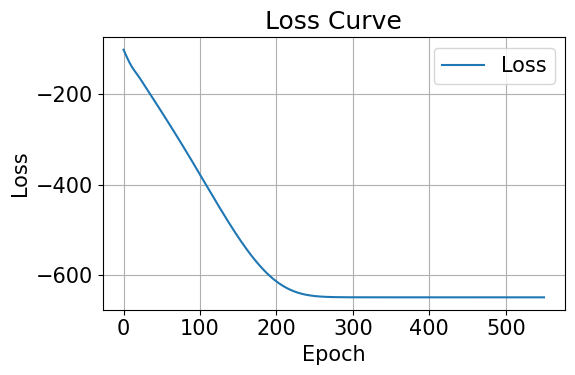

Average loss: -648.908632  [  575/  750]
l:       0.967622 
max:     1.571324 
slope:   26.185285 
loc:     3.533814 
decay:   0.340742 
sigma_n: 0.039213 
r_0:     3.273618 
s:       26.594196 
Minutes Taken Since Last Report: 1.901625 



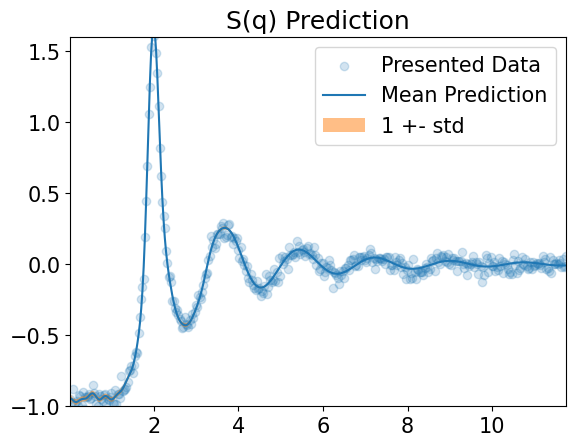

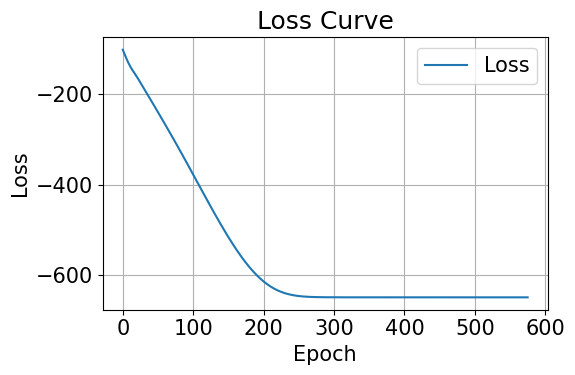

Average loss: -648.909413  [  600/  750]
l:       0.968380 
max:     1.576012 
slope:   26.165901 
loc:     3.533874 
decay:   0.340878 
sigma_n: 0.039208 
r_0:     3.273622 
s:       26.598111 
Minutes Taken Since Last Report: 1.652293 



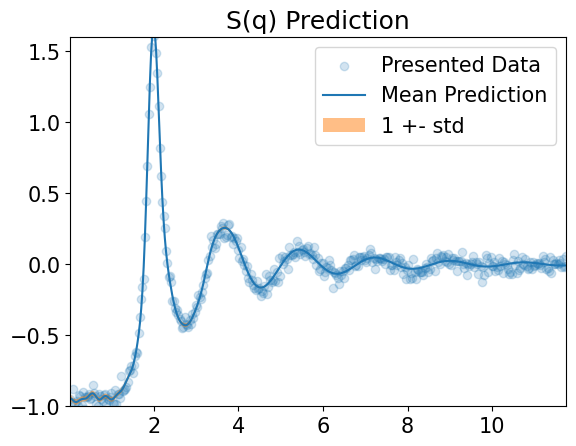

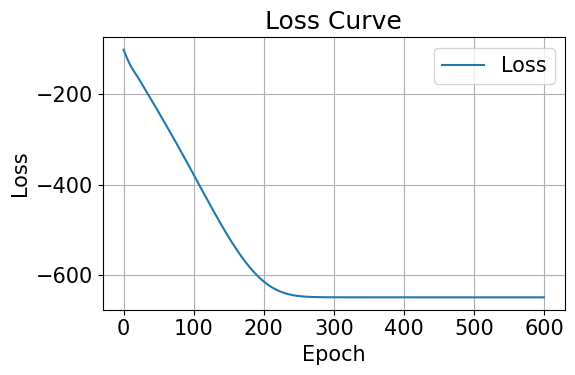

Average loss: -648.910029  [  625/  750]
l:       0.969018 
max:     1.579968 
slope:   26.149513 
loc:     3.533925 
decay:   0.340992 
sigma_n: 0.039203 
r_0:     3.273626 
s:       26.601426 
Minutes Taken Since Last Report: 1.565482 



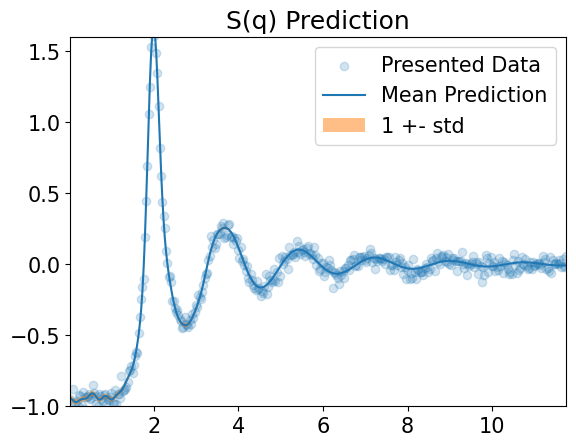

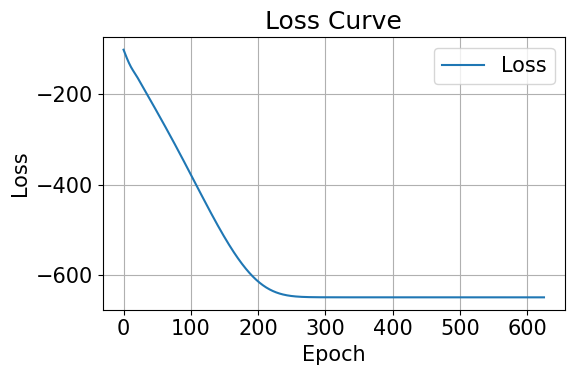

Average loss: -648.910525  [  650/  750]
l:       0.969550 
max:     1.583282 
slope:   26.135734 
loc:     3.533968 
decay:   0.341086 
sigma_n: 0.039198 
r_0:     3.273629 
s:       26.604226 
Minutes Taken Since Last Report: 1.594703 



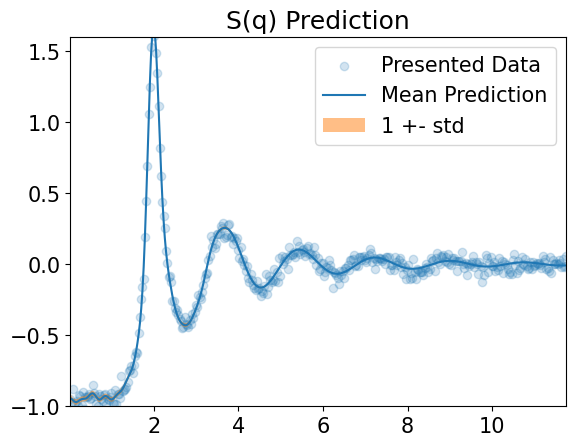

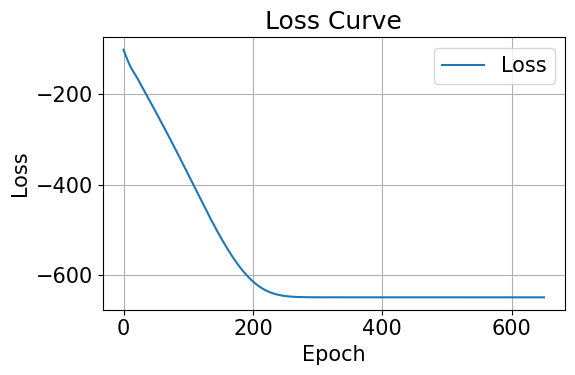

Average loss: -648.910935  [  675/  750]
l:       0.969991 
max:     1.586036 
slope:   26.124218 
loc:     3.534003 
decay:   0.341164 
sigma_n: 0.039194 
r_0:     3.273632 
s:       26.606581 
Minutes Taken Since Last Report: 1.601526 



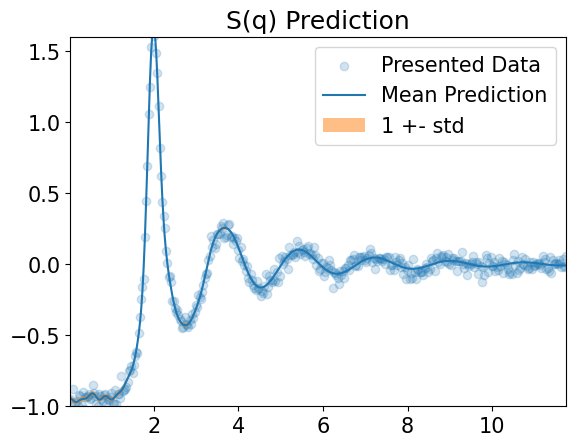

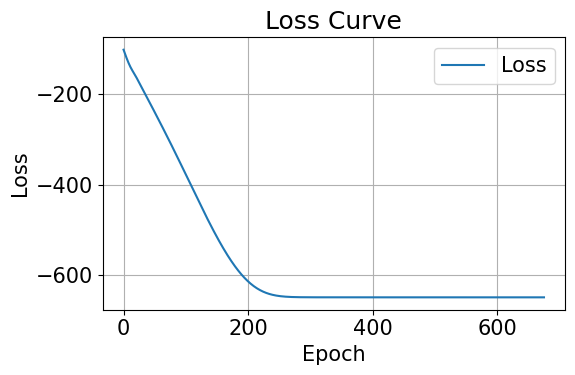

Average loss: -648.911282  [  700/  750]
l:       0.970354 
max:     1.588307 
slope:   26.114650 
loc:     3.534033 
decay:   0.341227 
sigma_n: 0.039190 
r_0:     3.273634 
s:       26.608555 
Minutes Taken Since Last Report: 1.559503 



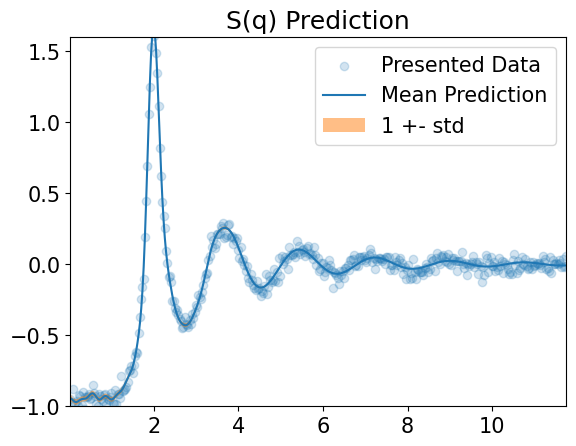

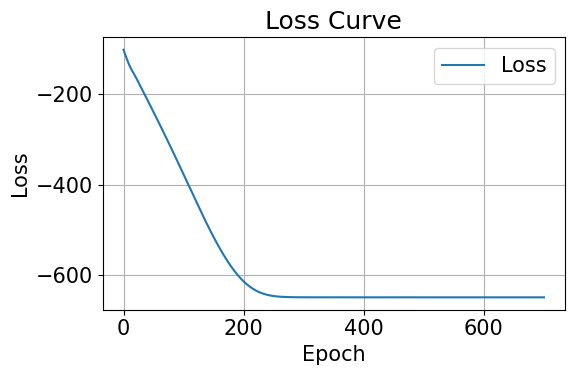

Average loss: -648.911584  [  725/  750]
l:       0.970650 
max:     1.590163 
slope:   26.106752 
loc:     3.534057 
decay:   0.341278 
sigma_n: 0.039186 
r_0:     3.273636 
s:       26.610205 
Minutes Taken Since Last Report: 1.560304 



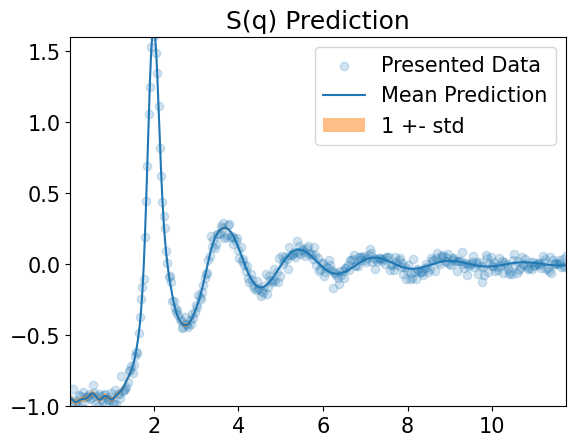

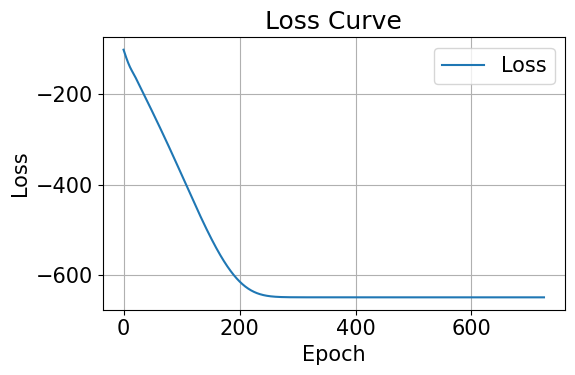

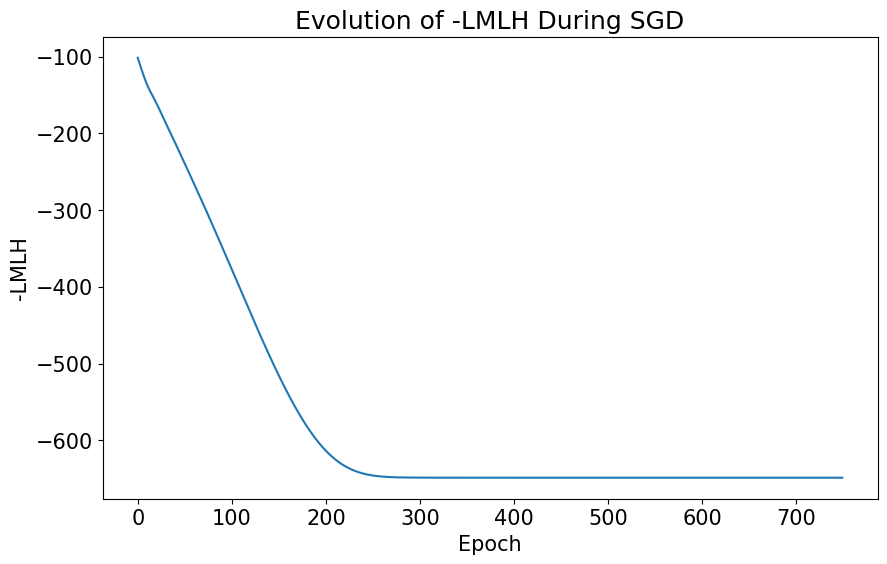

In [3]:
psq_name = 'Ar'

init_param_bounds = torch.zeros((8,2))

### Width Function Params ###

# Ell
init_param_bounds[0,1] = 2.5
init_param_bounds[0,0] = 0.1

# Max
init_param_bounds[1,1] = 4
init_param_bounds[1,0] = 0.2

# Slope
init_param_bounds[2,1] = 50
init_param_bounds[2,0] = 0.1

# Loc
init_param_bounds[3,1] = 6
init_param_bounds[3,0] = 0.5

# Decay
init_param_bounds[4,1] = 1
init_param_bounds[4,0] = 0.05

### Experimental Noise ###

# Sigma_n
init_param_bounds[5,1] = 0.5
init_param_bounds[5,0] = 0.0001

### Non-Bonded Peaks in Mean ###

# r_0
init_param_bounds[6,1] = 6
init_param_bounds[6,0] = 0.5

# s
init_param_bounds[7,1] = 50
init_param_bounds[7,0] = 0.1

init_params = torch.sum(init_param_bounds,dim=1)/2

init_params[1] = 0.8


model_path = 'models/'+str(temp)+'_'+psq_name+'_GP'
loss_path = 'models/'+str(temp)+'_'+psq_name+'_losses.pt'


# Create GP Object
gp = gptransform.GP(init_params, init_param_bounds, 0, density, temp)

# Perform hyper parameter optimization
optimizer = torch.optim.AdamW(gp.parameters(), lr=1e-2)
losses = gptransform.train_loop(dataset, gp, optimizer, 750, r_grid, q_values,  partial_sq, q_infer, r_infer, -1,1.6, -0.1,3.1)

# Save GP
torch.save(gp, model_path)
torch.save(torch.tensor(losses), loss_path)

# Plot Loss
plt.figure(figsize=(10, 6))
plt.plot(losses, linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('-LMLH')
plt.title('Evolution of -LMLH During SGD')
plt.savefig('figs/'+str(temp)+'_'+psq_name+'_LMLH.png')
plt.show()

# Resulting Hyper Parameters

In [4]:
names = ["l", "max", "slope", "loc", "decay", "sigma_n", "r_0", "s"]

print(f"{'Name':<10} {'Init Value':<12} {'Lower Bound':<15} {'Upper Bound':<15} {'Final Value':<15} {'Δ':<12} {'% Change':<10}")
print("-" * 100)

for name, init, lo, hi, final in zip(
    names,
    init_params.tolist(),
    init_param_bounds.T[0].tolist(),
    init_param_bounds.T[1].tolist(),
    gp.theta.tolist()
):
    delta = final - init
    denom = hi - lo
    percent = 100 * delta / denom 
    print(f"{name:<10} {init:<12.6f} {lo:<15.6f} {hi:<15.6f} {final:<15.6f} {delta:<12.6f} {percent:<10.2f}")


Name       Init Value   Lower Bound     Upper Bound     Final Value     Δ            % Change  
----------------------------------------------------------------------------------------------------
l          1.300000     0.100000        2.500000        0.970872        -0.329128    -13.71    
max        0.800000     0.200000        4.000000        1.591555        0.791555     20.83     
slope      25.050000    0.100000        50.000000       26.100749       1.050749     2.11      
loc        3.250000     0.500000        6.000000        3.534076        0.284076     5.17      
decay      0.525000     0.050000        1.000000        0.341316        -0.183684    -19.34    
sigma_n    0.250050     0.000100        0.500000        0.039182        -0.210868    -42.18    
r_0        3.250000     0.500000        6.000000        3.273637        0.023637     0.43      
s          25.050000    0.100000        50.000000       26.611479       1.561479     3.13      


# Apply Laplaces Approximation

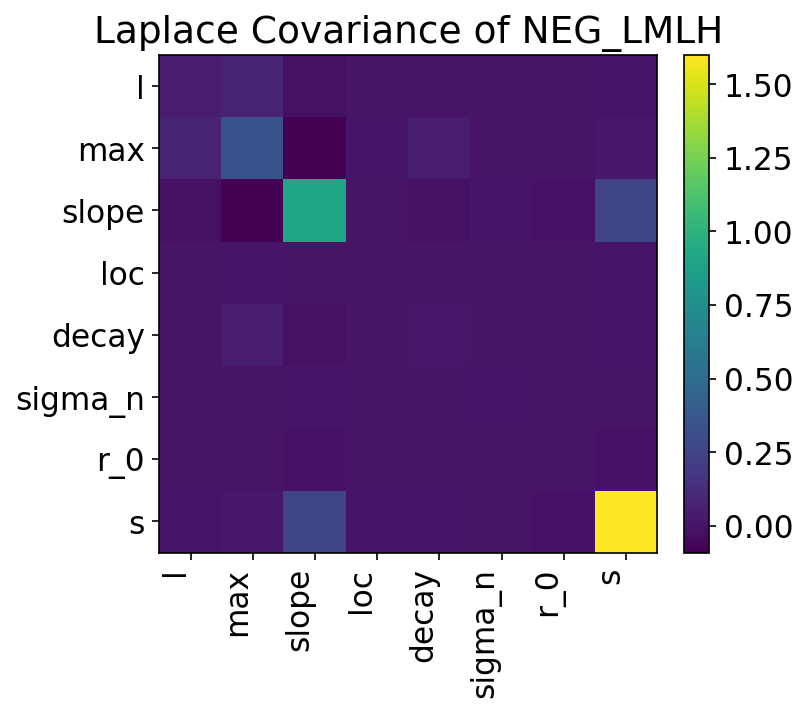

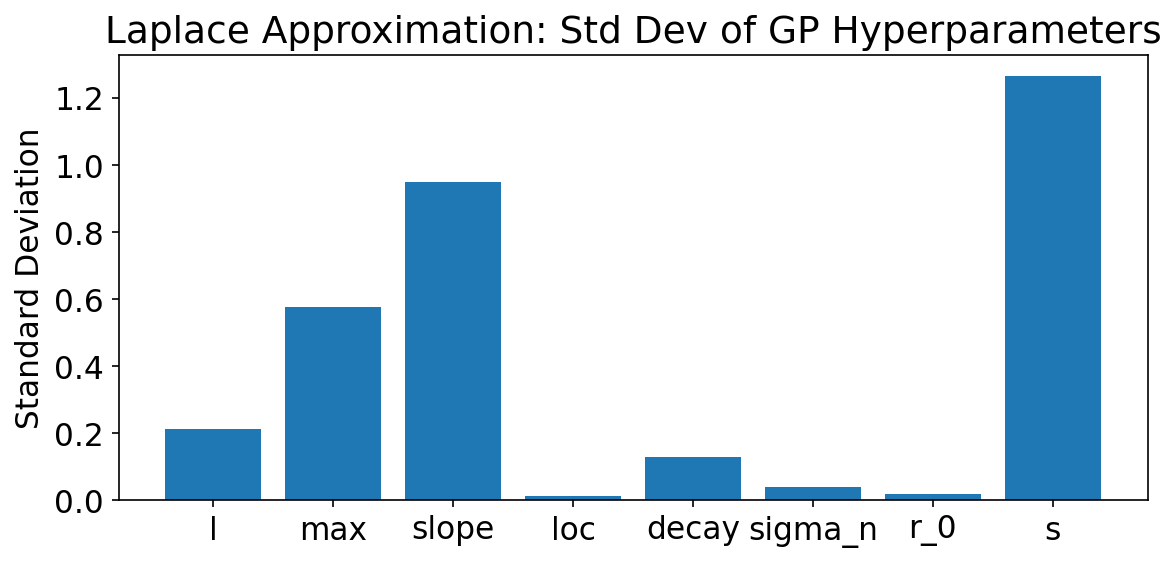

In [5]:
q_train = q_values
sq_train = partial_sq

loss_at_map = gp.NEG_LMLH_Trapz(r_grid, q_values, sq_train)

grad = torch.autograd.grad(loss_at_map, gp.theta_raw, create_graph=True)[0]  # shape: (P,)
P = grad.numel()
grad_flat = grad.view(-1)

H = torch.zeros(P, P, device=grad.device)
for i in range(P):
    grad2 = torch.autograd.grad(grad_flat[i], gp.theta_raw, retain_graph=True)[0].view(-1)
    H[i] = grad2.detach()

L = torch.linalg.cholesky(gp.nearestPD(H))  
cov_laplace = torch.cholesky_inverse(L)

stds = torch.sqrt(torch.diag(cov_laplace)).cpu().numpy()

fig, ax = plt.subplots(figsize=(6, 5), dpi=150)
im = ax.imshow(cov_laplace, cmap='viridis')
fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)

ax.set_xticks(range(P))
ax.set_yticks(range(P))
ax.set_xticklabels(names, rotation=90, ha='right')
ax.set_yticklabels(names)
ax.set_title("Laplace Covariance of NEG_LMLH")
plt.tight_layout()
plt.show()

fig, ax = plt.subplots(figsize=(8, 4), dpi=150)
ax.bar(names, stds)
ax.set_ylabel("Standard Deviation")
ax.set_title("Laplace Approximation: Std Dev of GP Hyperparameters")
plt.tight_layout()
plt.show()

#  Compute the Posteriors

In [6]:
with torch.no_grad():

    r_grid =  torch.linspace(0.01, 25  , 1000).reshape(-1,1)
    r_infer = torch.linspace(0.01, 25  , 1000).reshape(-1,1)
    q_infer = torch.linspace(0.01, 12.5, 1000).reshape(-1,1)

    # Calculate Posterior Mean and Cov in momentum space
    μ_q_post, Σ_q_post = gp.predict_sq_trapz(r_grid, q_infer, q_train, sq_train,adjust=False)
    μ_q_post = μ_q_post.detach()
    Σ_q_post = Σ_q_post.detach()
    
    μ_q_prior = gp.mean_q(r_grid,q_infer)
    Σ_q_prior = gp.K_qq(r_grid, r_grid, q_infer, q_infer,adjust=False)

    # Calculate Posterior Mean and Cov in real space
    μ_r_post, Σ_r_post = gp.predict_rdf_trapz(r_grid, r_infer, q_train, sq_train,adjust=False)
    μ_r_post = μ_r_post.detach()
    Σ_r_post = Σ_r_post.detach()
    
    μ_r_prior = gp.mean_r(r_infer)
    Σ_r_prior = gp.K_rr(r_infer, r_infer,adjust=False)

    kernels = [(Σ_q_post, q_infer.T[0], q_infer.T[0]),(Σ_r_post, r_infer.T[0], r_infer.T[0])]   

# Plot the Posteriors

/var/folders/tv/1d811xv917v4wz50x1bqpvcc0000gn/T/ipykernel_41387/3028370064.py:128: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


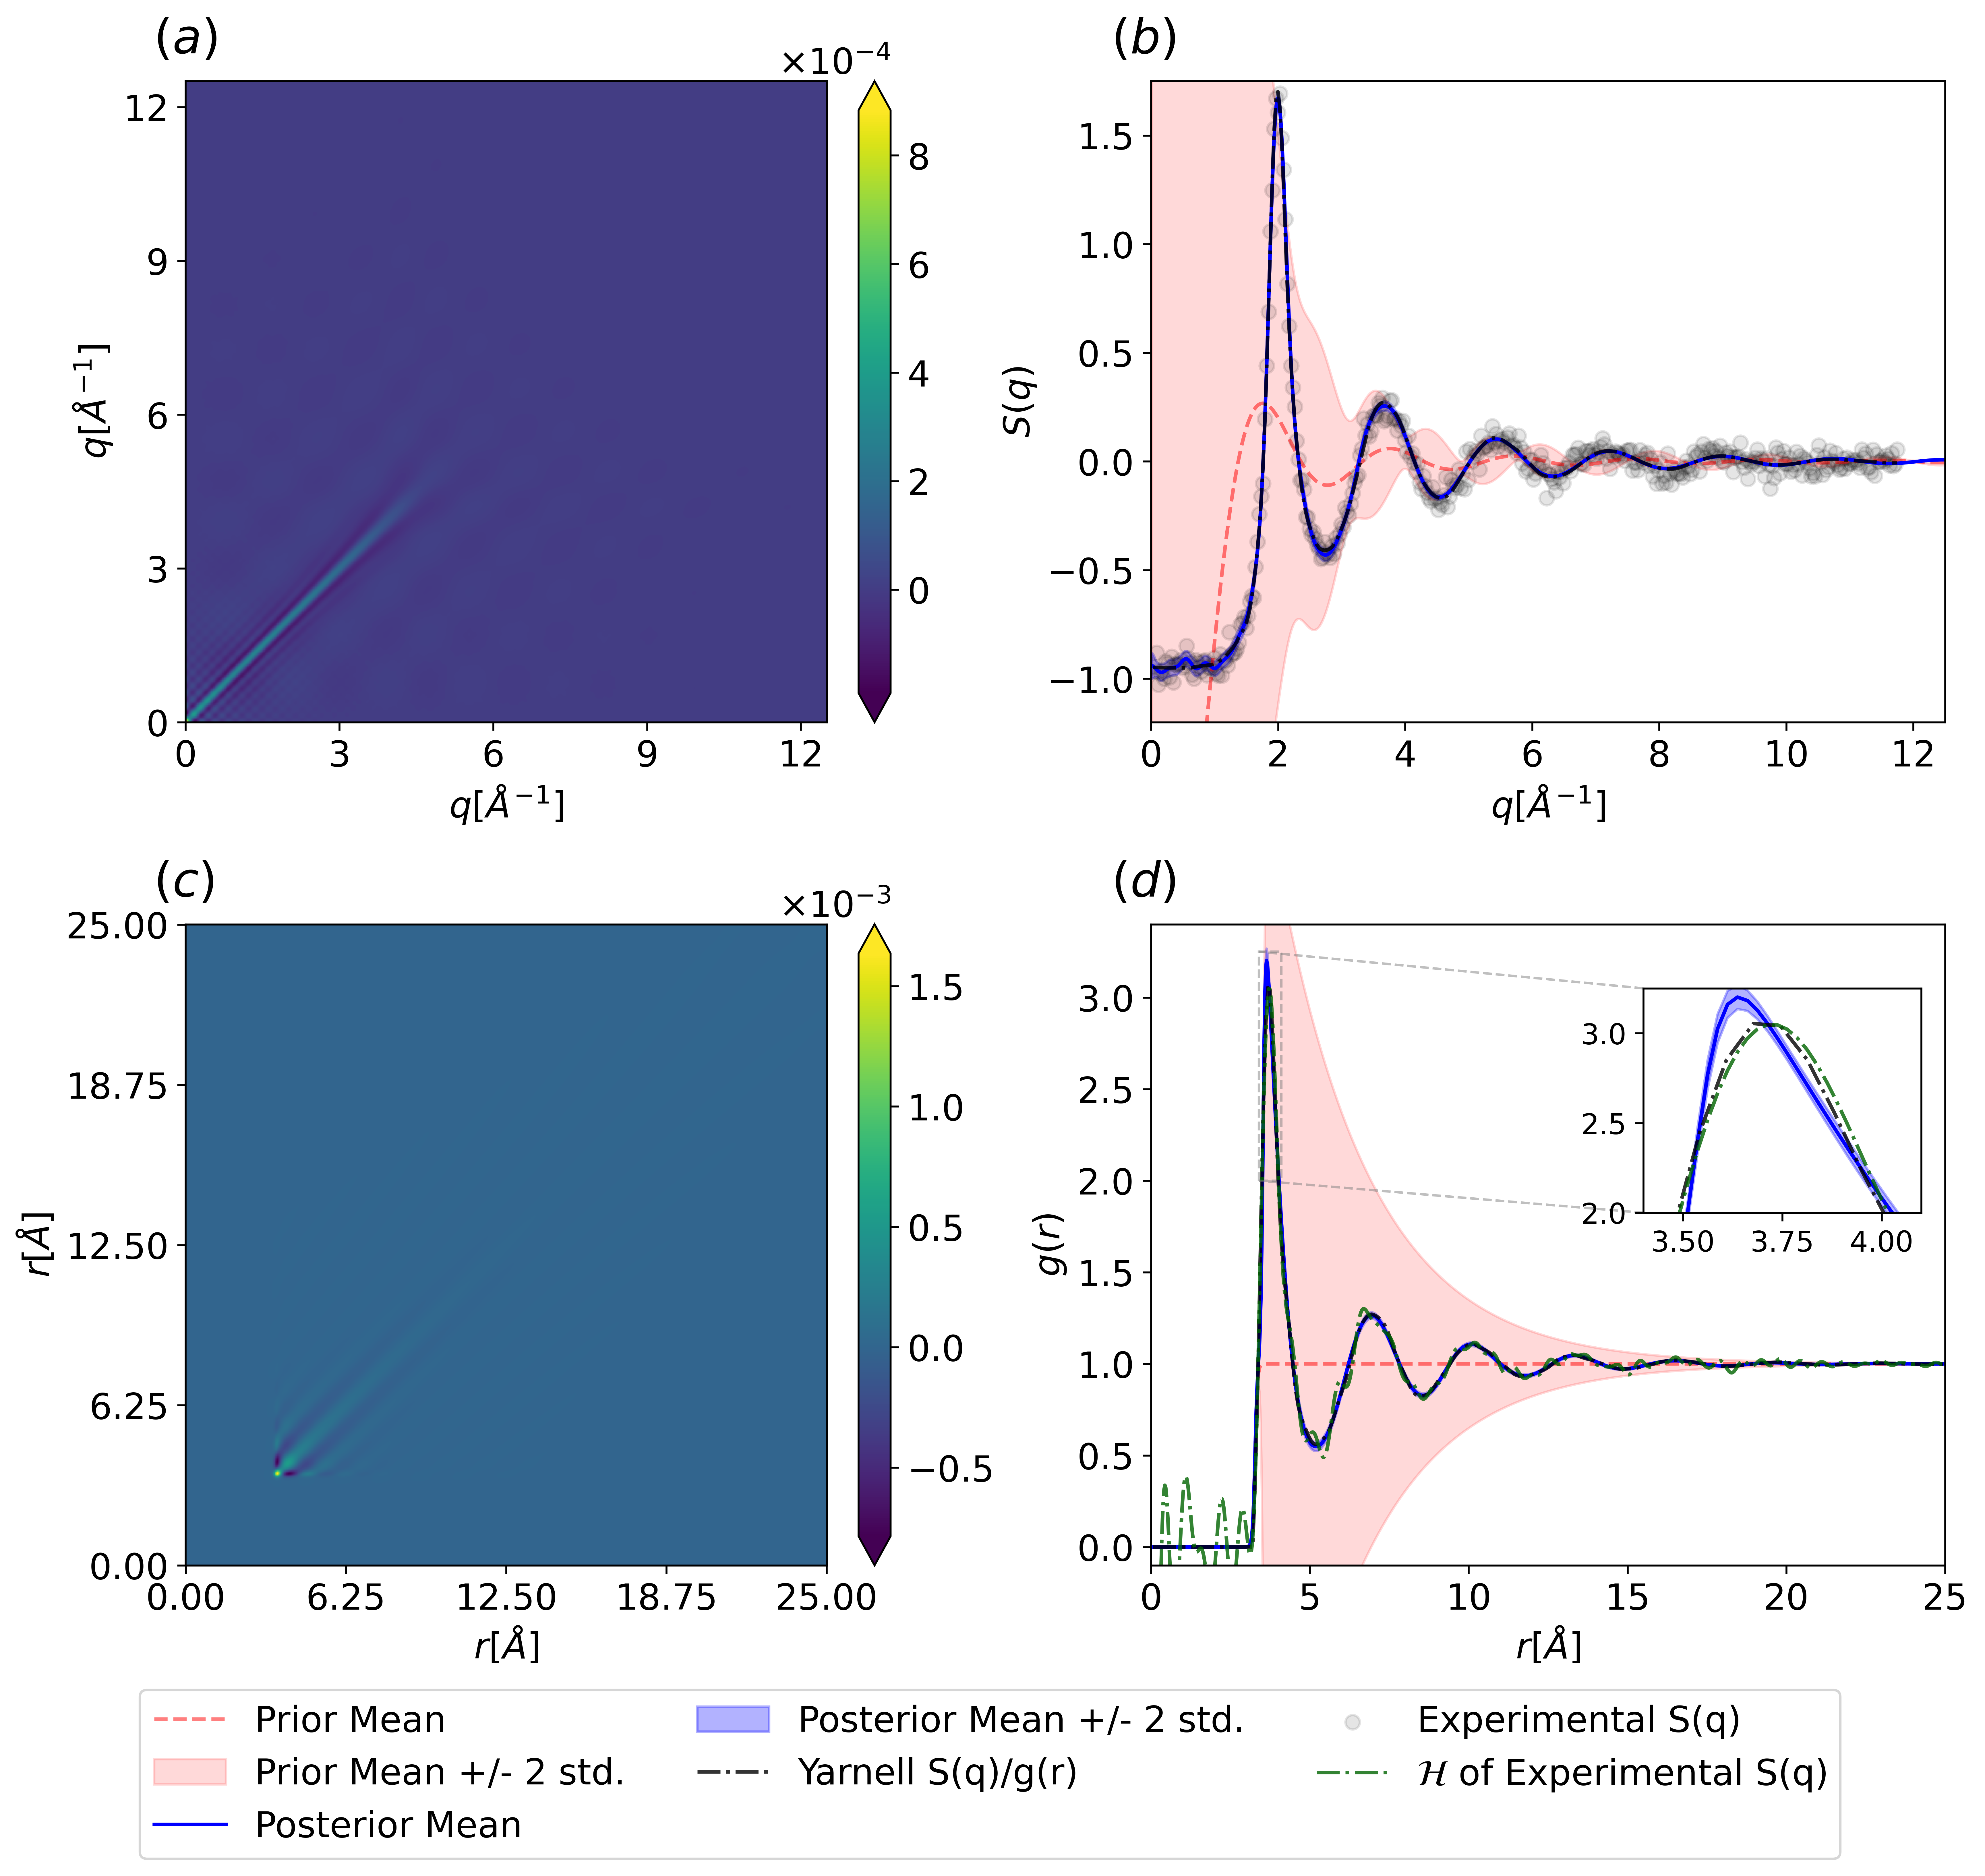

In [7]:
titles = ["$\Sigma_{{Post.}}$", "$\Sigma_{{Post.,RDF}}$",]
xlabels = ["$q [\AA^{-1}]$", "$r [\AA]$"]
ylabels = ["$q [\AA^{-1}]$", "$r [\AA]$"]

fig, axs = plt.subplots(2, 2, figsize=(12, 10), dpi=600)

bound = 30

for idx, (ax, (kernel, x_dom, y_dom), title, xlabel, ylabel) in enumerate(
        zip(axs[:,0], kernels, titles, xlabels, ylabels)):

    kernel = kernel.clamp(-bound, bound)         
    vmin, vmax = -bound, bound
    extend_opt = 'both'                     

    c = ax.pcolormesh(x_dom.numpy(), y_dom.numpy(),
                      kernel.numpy(), shading='auto',
                      cmap='viridis')
    
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.set_aspect('equal')

    cb = fig.colorbar(c, ax=ax, fraction=0.046, pad=0.04,
                 extend=extend_opt, extendfrac=0.05)
    
    cb.formatter = ScalarFormatter(useMathText=True)
    cb.formatter.set_scientific(True)
    cb.formatter.set_powerlimits((-2, 2))
    cb.update_ticks()
    
axs[0,0].set_xticks(np.linspace(0, 12, 5) )
axs[0,0].set_yticks(np.linspace(0, 12, 5) )

axs[1,0].set_xticks(np.linspace(0, 25, 5) )
axs[1,0].set_yticks(np.linspace(0, 25, 5) )
    
fill_between_alpha = 0.3
prior_fill_between_ratio = 0.5
lettering_size = 20

axs[0,1].plot(q_infer.T[0], μ_q_prior.T[0], label="Prior Mean", linestyle='dashed', alpha=0.5, color='r')
axs[0,1].fill_between(q_infer.T[0], μ_q_prior.T[0] + 2*torch.diag(Σ_q_prior)**0.5, μ_q_prior.T[0] - 2*torch.diag(Σ_q_prior)**0.5, alpha=prior_fill_between_ratio*fill_between_alpha, label="Prior Mean +/- 2 std.", color='r')
axs[0,1].plot(q_infer.T[0], μ_q_post.T[0], label="Posterior Mean", color='b')
axs[0,1].fill_between(q_infer.T[0], μ_q_post.T[0] + 2*torch.diag(Σ_q_post)**0.5, μ_q_post.T[0] - 2*torch.diag(Σ_q_post)**0.5, alpha=fill_between_alpha, label="Posterior Mean +/- 2 std.", color='b')
axs[0,1].plot(q_values,sq_reported, label='Yarnell S(q)/g(r)', alpha=0.8, color='k', linestyle='dashdot')
axs[0,1].scatter(q_train, sq_train, label='Experimental S(q)', alpha=0.1, color='k')
axs[0,1].set_xlim(0, 12.5)
axs[0,1].set_ylim(-1.2,1.75)
axs[0,1].set_xlabel('$q [Å^{-1}]$')
axs[0,1].set_ylabel('$S(q)$')

axs[1,1].plot(r_infer.T[0], μ_r_prior.T[0], label="Prior Mean", linestyle='dashed', alpha=0.5, color='r')
axs[1,1].fill_between(r_infer.T[0], μ_r_prior.T[0] + 2*torch.diag(Σ_r_prior)**0.5, μ_r_prior.T[0] - 2*torch.diag(Σ_r_prior)**0.5, alpha=prior_fill_between_ratio*fill_between_alpha, label="Prior Mean +/- 2 std.", color='r')
axs[1,1].plot(r_infer.T[0], μ_r_post.T[0], label="Posterior Mean", color='b')
axs[1,1].fill_between(r_infer.T[0], μ_r_post.T[0] + 2*torch.diag(Σ_r_post)**0.5, μ_r_post.T[0] - 2*torch.diag(Σ_r_post)**0.5, alpha=fill_between_alpha, label="Posterior Mean +/- 2 std.", color='b')
axs[1,1].plot(r,gr, label='Yarnell S(q)/g(r)', alpha=0.8, color='k', linestyle='dashdot')
axs[1,1].plot(r_infer.T[0], gptransform.sq2rdf(q_train.T[0], sq_train.T[0], r_infer.T[0], density)+1, label='$\mathcal{H}$ of Experimental S(q)', color='darkgreen',alpha=0.8,linestyle='dashdot')
axs[1,1].set_ylim(-0.1, 3.4)
axs[1,1].set_xlim(0, 25)
axs[1,1].set_xlabel('$r [Å]$')
axs[1,1].set_ylabel('$g(r)$')
     
axins = inset_axes(
    axs[1, 1],
    width="35%", height="35%",
    bbox_to_anchor=(0.62, -0.1, 1, 1),
    bbox_transform=axs[1,1].transAxes,
    loc='upper left',
    borderpad=0
)

axins.plot(r_infer.T[0], μ_r_post.T[0], label="Posterior Mean", color='b')
axins.fill_between(r_infer.T[0], μ_r_post.T[0] + 2*torch.diag(Σ_r_post)**0.5, μ_r_post.T[0] - 2*torch.diag(Σ_r_post)**0.5, alpha=fill_between_alpha, label="Posterior Mean +/- 2 std.", color='b')
axins.plot(r,gr, label='Reported S(q)/g(r)', alpha=0.8, color='k', linestyle='dashdot')
axins.plot(r_infer.T[0], gptransform.sq2rdf(q_train.T[0], sq_train.T[0], r_infer.T[0], density)+1, label='$\mathcal{H}$ of Experimental S(q)', color='darkgreen',alpha=0.8,linestyle='dashdot')
axins.set_ylim(2, 3.25)
axins.set_xlim(3.4, 4.1)


axins.tick_params(labelsize=12)

mark_inset(axs[1,1], axins, loc1=2, loc2=3, fc="none", ec="0.5",linestyle='dashed',alpha=0.5)


# axins = inset_axes(axs[1,1],
#                    width="35%", height="35%",      
#                    loc='upper right',              
#                    borderpad=1.2)                  

# axins.plot(r_infer.T[0], μ_r_post.T[0], label="Posterior Mean", color='b')
# axins.fill_between(r_infer.T[0], μ_r_post.T[0] + 2*torch.diag(Σ_r_post)**0.5, μ_r_post.T[0] - 2*torch.diag(Σ_r_post)**0.5, alpha=fill_between_alpha, label="Posterior Mean +/- 2 std.", color='b')
# axins.plot(r,gr, label='True S(q)/g(r)', alpha=0.8, color='k', linestyle='dashdot')
# # axins.plot(r_infer.T[0], gptransform.sq2rdf(q_train.T[0], sq_train.T[0], r_infer.T[0], density)+1, label='$\mathcal{H}$ of Experimental S(q)', color='darkgreen',alpha=0.8,linestyle='dashdot')
# axins.set_ylim(2.1, 3.1)
# axins.set_xlim(2.6, 3.0)
# axins.set_xticks([2.6, 2.8, 3.0])
# axins.set_yticks([2.2, 2.6, 3.0])


# axins.tick_params(labelsize=12)
# mark_inset(axs[1,1], axins, loc1=2, loc2=3, fc="none", ec="0.5",linestyle='dashed',alpha=0.5)

# Collect unique legend handles and labels
handles1, labels1 = axs[0,1].get_legend_handles_labels()
handles2, labels2 = axs[1,1].get_legend_handles_labels()

# Use dict to ensure uniqueness
handle_label_dict = dict(zip(labels1 + labels2, handles1 + handles2))
labels_combined, handles_combined = zip(*handle_label_dict.items())

# Add figure-level legend below all subplots
fig.legend(
    handles_combined, labels_combined,
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    frameon=True
)

for i, ax in enumerate(axs.flat):
    label = f"$({string.ascii_lowercase[i]})$"
    ax.text(-0.05, 1.1, label,
            transform=ax.transAxes,
            fontsize=lettering_size, va='top', ha='left')


plt.tight_layout()
plt.savefig("figs/Ar_experimental_post.png", bbox_inches='tight')

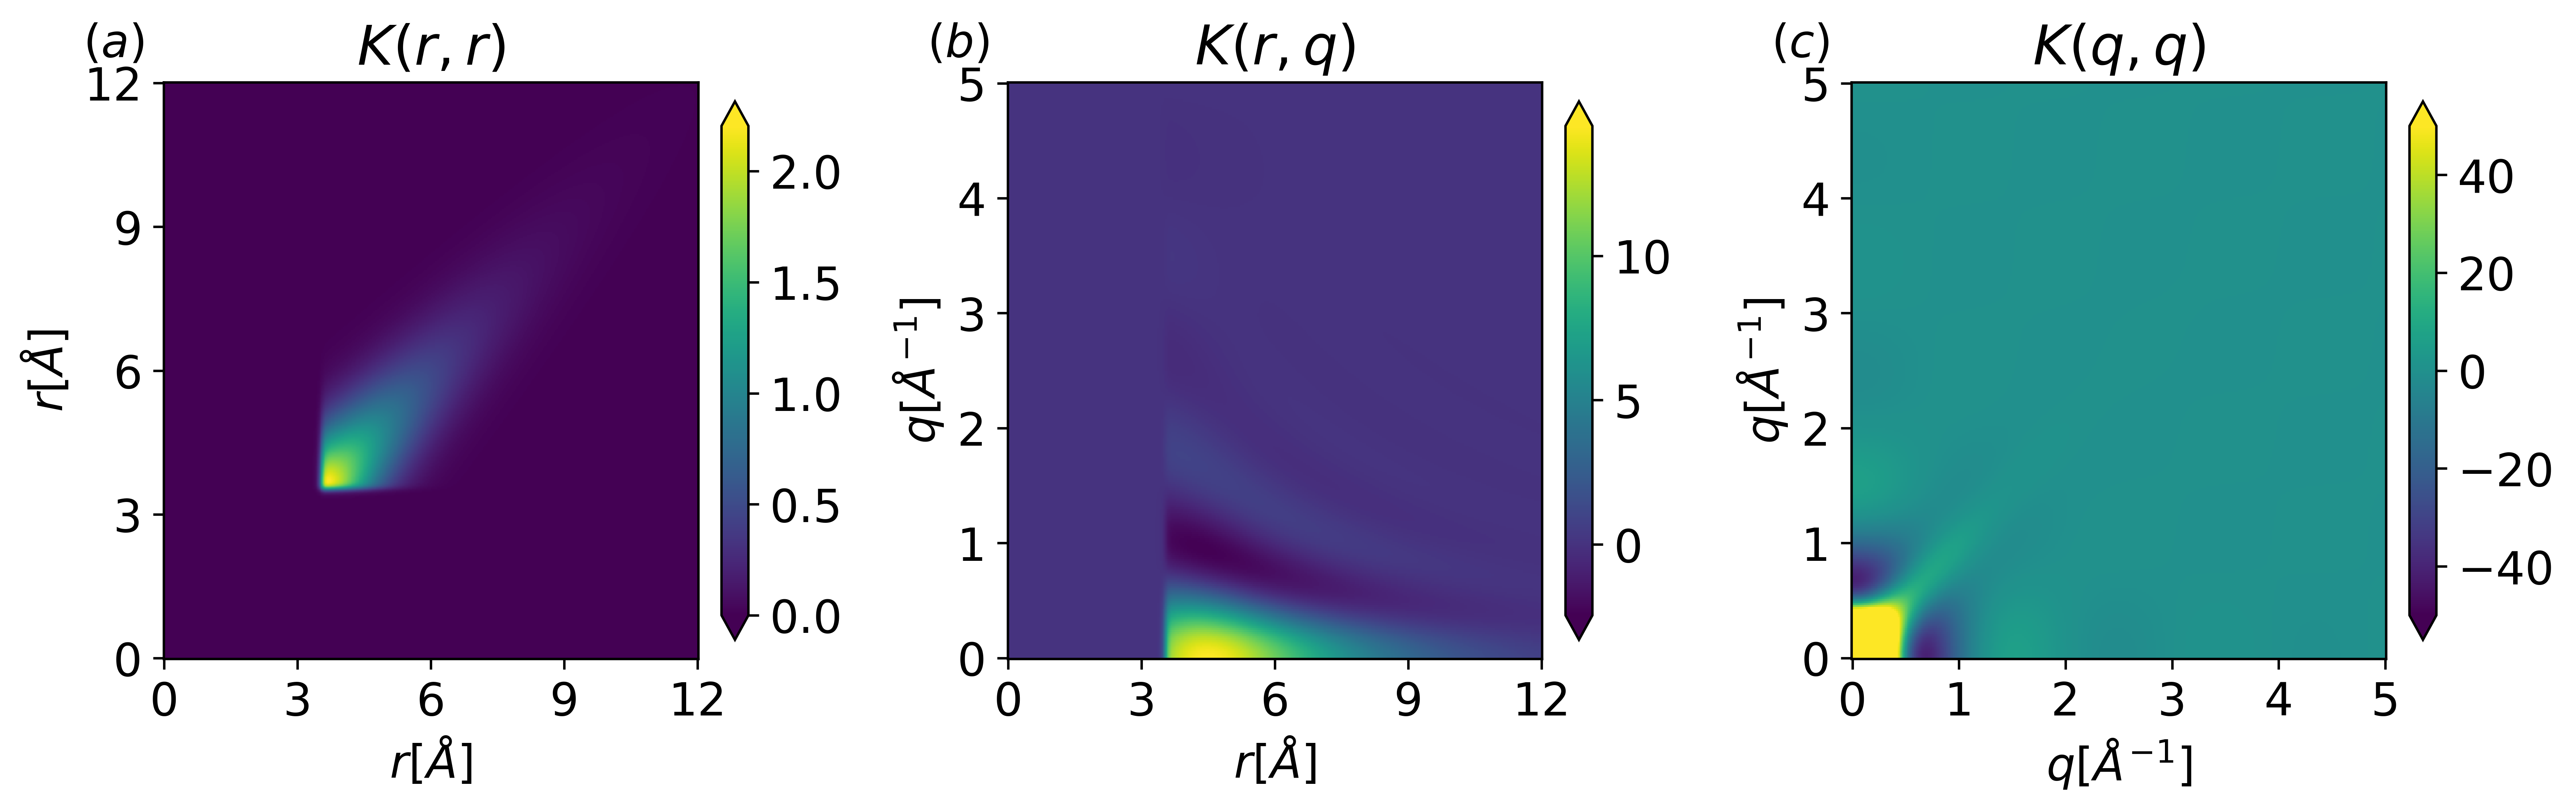

In [8]:
import matplotlib.pyplot as plt
import string

with torch.no_grad():
    r_infer_k_plot = torch.linspace(0.0001, 12, 400, dtype=torch.float64).reshape(-1, 1)
    q_infer_k_plot = torch.linspace(0.0001, 5, 300, dtype=torch.float64).reshape(-1, 1)
    bound = 50

    K1_matrix = gp.K_rr(r_infer_k_plot, r_infer_k_plot, adjust=False).detach()
    K2_matrix = gp.K_rq(r_infer_k_plot, r_grid, q_infer_k_plot, adjust=False).T.detach()
    K3_matrix = gp.K_qq(r_grid, r_grid, q_infer_k_plot, q_infer_k_plot, adjust=False).detach()

    fig, axs = plt.subplots(1, 3, figsize=(12, 4), dpi=600)

    kernels = [
        (K1_matrix, r_infer_k_plot.T[0], r_infer_k_plot.T[0]),
        (K2_matrix, r_infer_k_plot.T[0], q_infer_k_plot.T[0]),
        (K3_matrix, q_infer_k_plot.T[0], q_infer_k_plot.T[0]),
    ]
    titles = ["$K(r,r)$", "$K(r,q)$", "$K(q,q)$"]
    xlabels = ["$r [\AA]$", "$r [\AA]$", "$q [\AA^{-1}]$"]
    ylabels = ["$r [\AA]$", "$q [\AA^{-1}]$", "$q [\AA^{-1}]$"]

    for idx, (ax, (kernel, x_dom, y_dom), title, xlabel, ylabel) in enumerate(
        zip(axs, kernels, titles, xlabels, ylabels)
    ):
        if idx == 0:
            ticks = np.linspace(0, 12, 5) 
            ax.set_xticks(ticks)
            ax.set_yticks(ticks)
        if idx == 1:
            ax.set_xticks(np.linspace(0, 12, 5) )
            ax.set_yticks(np.linspace(0, 5, 6) )
        if idx == 2:
            kernel = kernel.clamp(-bound, bound)
            vmin, vmax = -bound, bound
            ax.set_yticks(np.linspace(0, 5, 6) )
            ax.set_xticks(np.linspace(0, 5, 6) )
        else:
            vmin, vmax = None, None

        pcm = ax.pcolormesh(x_dom.numpy(), y_dom.numpy(), kernel.numpy(),
                            shading='auto', cmap='viridis',
                            vmin=vmin, vmax=vmax)

        ax.set_title(title)
        ax.set_xlabel(xlabel)
        ax.set_ylabel(ylabel)


        # Colorbar on the right with caps
        cb = fig.colorbar(pcm, ax=ax, orientation='vertical',
                          extend='both', extendfrac=0.05,
                          fraction=0.046, pad=0.04)

    # Add subplot labels
    for i, ax in enumerate(axs):
        label = f"$({string.ascii_lowercase[i]})$"
        ax.text(-0.15, 1.105, label, transform=ax.transAxes,
                va='top', ha='left')

    plt.tight_layout()
    plt.savefig("figs/Ar_experimental_kernels.png", bbox_inches='tight')

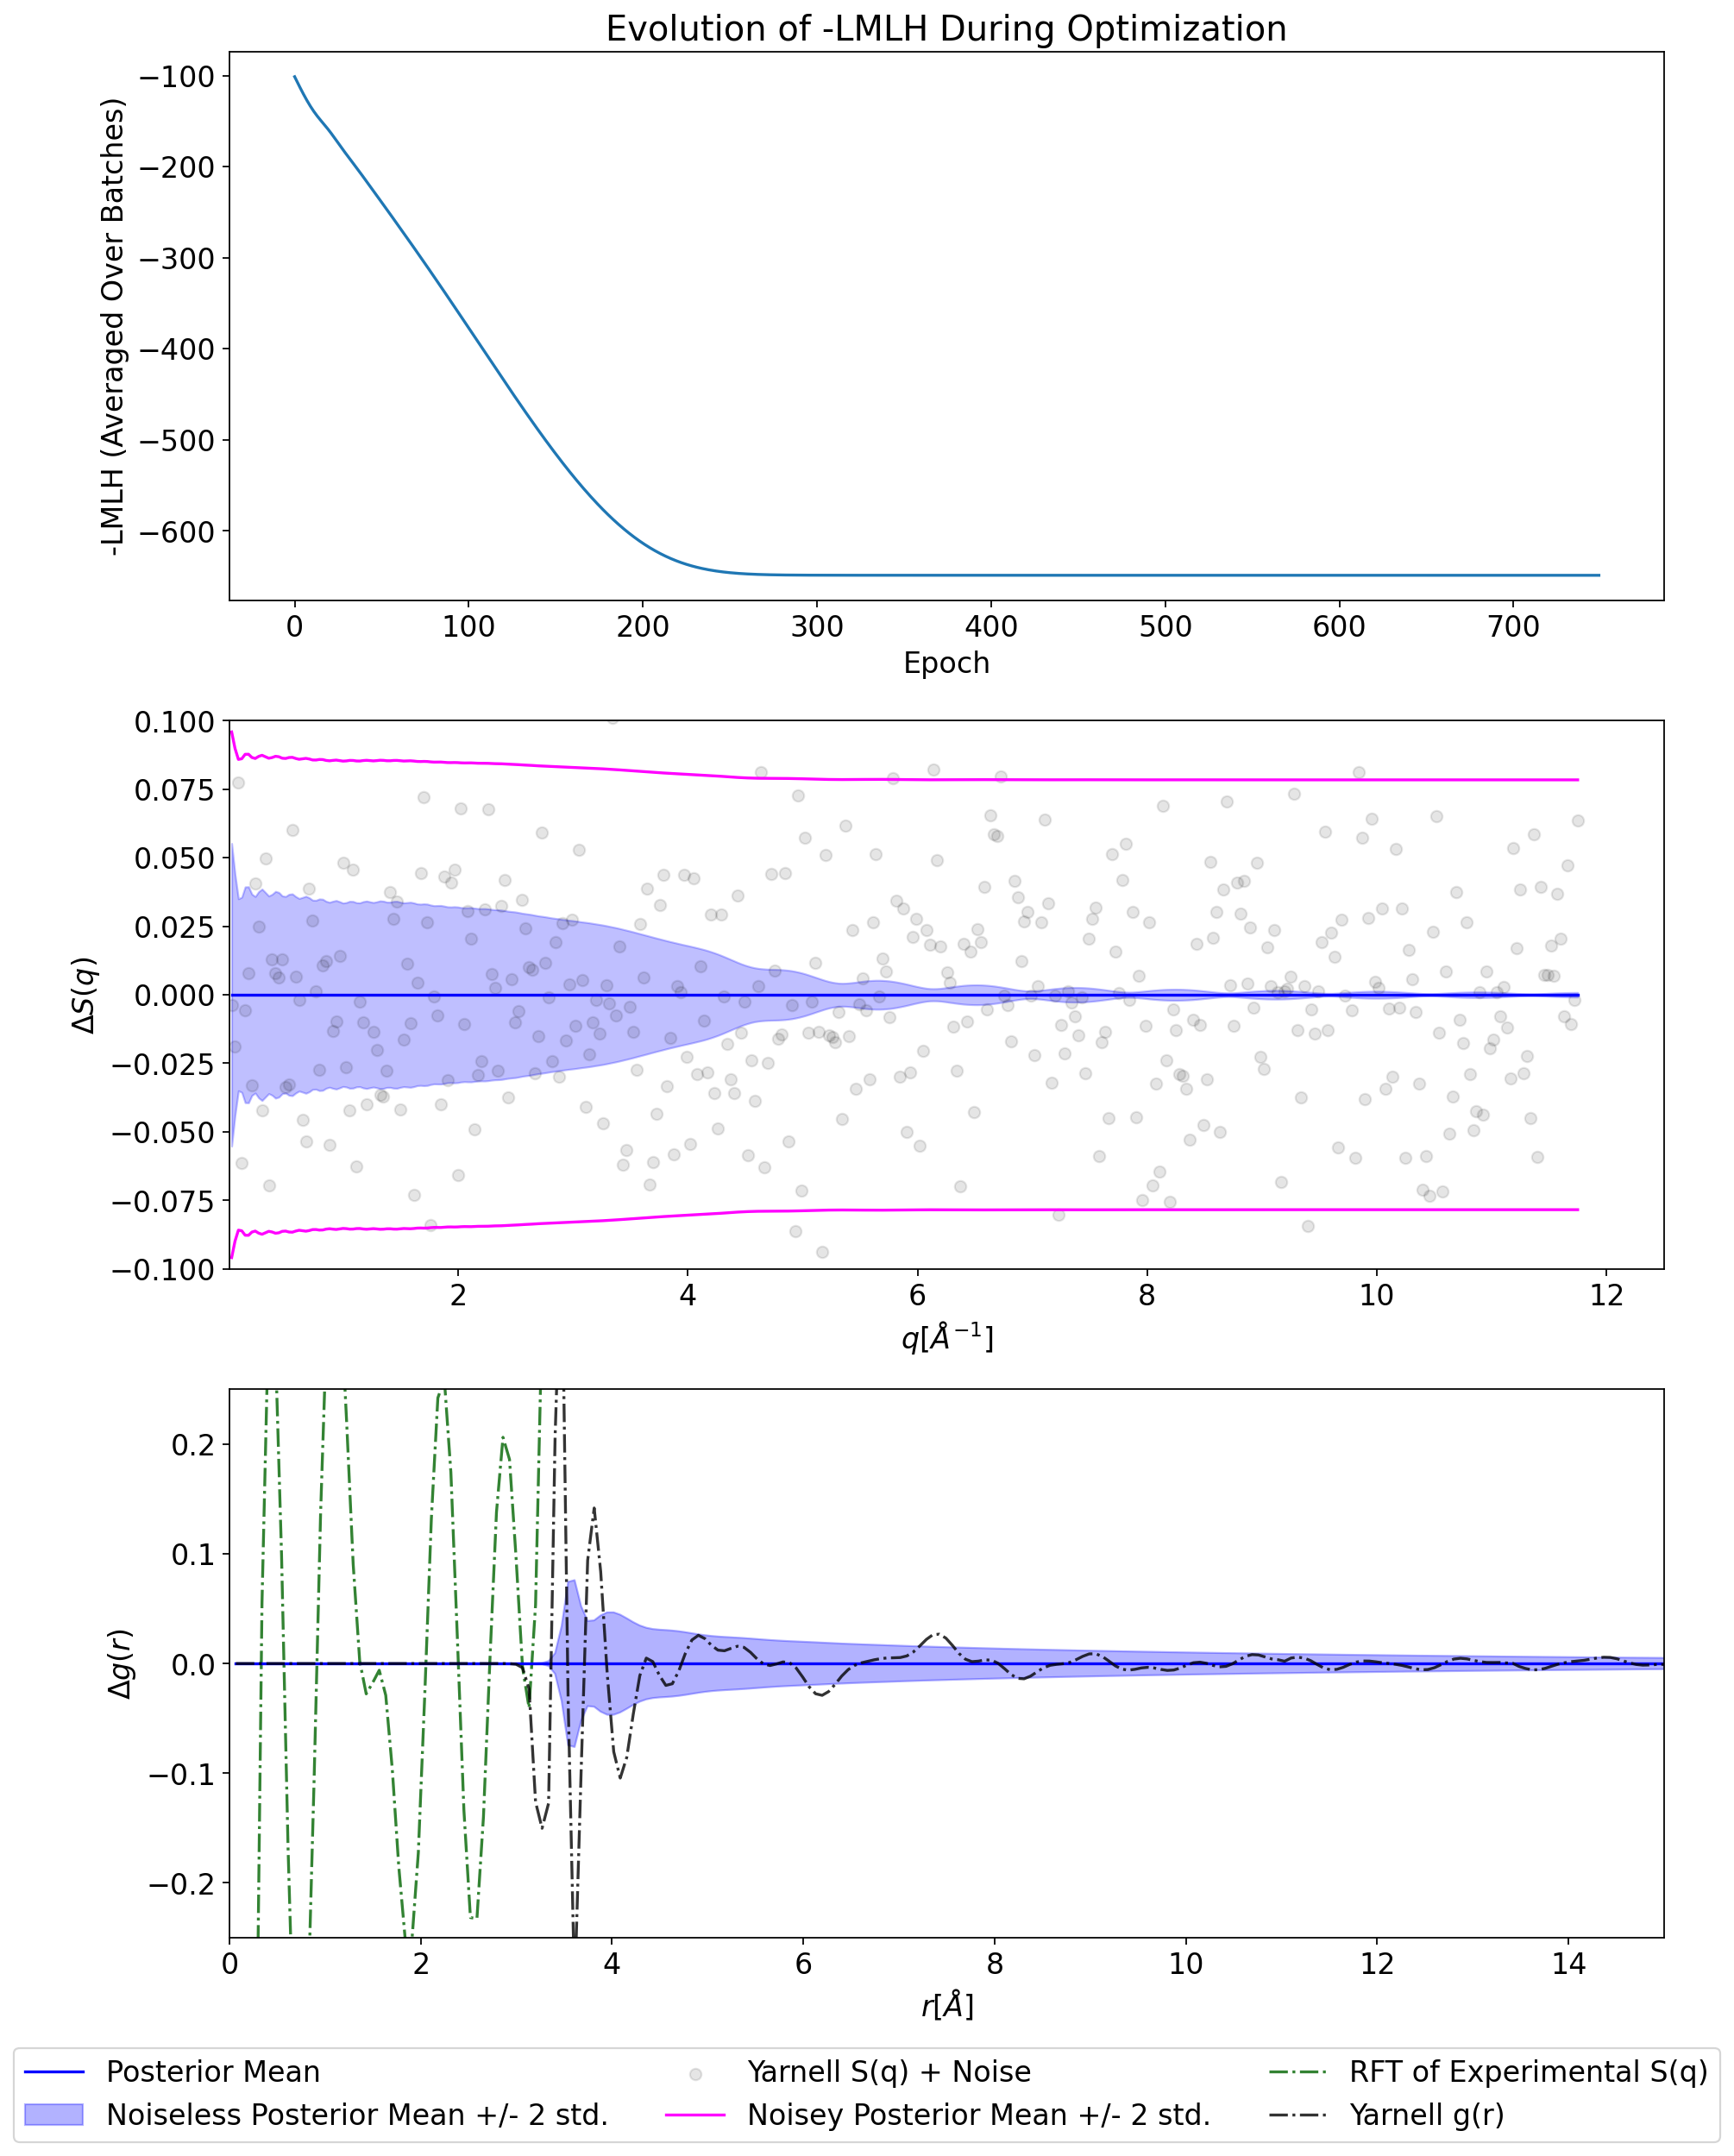

In [9]:
with torch.no_grad():
    fig, axs = plt.subplots(3,1, figsize=(12, 15), dpi=160)
    
    q_infer = q_train
        
    # Calculate Prior Mean and Cov
    Σ_q_prior = gp.K_qq(r_grid,r_grid,q_infer,q_infer).detach()
    μ_q_prior = gp.mean_q(r_grid,q_infer).detach()
    
    Σ_r_prior = gp.K_rr(r.reshape(-1,1),r.reshape(-1,1)).detach()
    μ_r_prior = gp.mean_r(r.reshape(-1,1)).detach()

    # Calculate Posterior Mean and Cov
    μ_q_post, Σ_q_post = gp.predict_sq_trapz(r_grid, q_infer, q_train, sq_train,adjust=False)
    μ_q_post = μ_q_post.detach()
    Σ_q_post = Σ_q_post.detach()
    
    μ_r_post, Σ_r_post = gp.predict_rdf_trapz(r_grid, r.reshape(-1,1), q_train, sq_train,adjust=False)
    μ_r_post = μ_r_post.detach()
    Σ_r_post = Σ_r_post.detach()    
        
    axs[1].plot(q_infer.T[0],torch.zeros_like(q_infer.T[0]),label="Posterior Mean",color='b')
    axs[1].fill_between(q_infer.T[0],2*torch.diag(Σ_q_post)**0.5,  -2*torch.diag(Σ_q_post)**0.5,alpha=0.25,label="Noiseless Posterior Mean +/- 2 std.",color='b')
    axs[1].scatter(q_train,sq_train-μ_q_post,label='Yarnell S(q) + Noise',alpha=0.1,color='k')
    axs[1].plot(q_infer.T[0],2*torch.diag(Σ_q_post + torch.eye(len(q_infer))*(gp.theta[5]**2))**0.5,label="Noisey Posterior Mean +/- 2 std.",color='magenta')
    axs[1].plot(q_infer.T[0],-2*torch.diag(Σ_q_post + torch.eye(len(q_infer))*(gp.theta[5]**2))**0.5,color='magenta')

    axs[1].set_xlim(0.01,12.5)
    axs[1].set_ylim(-0.1,0.1)

    axs[1].set_xlabel('$q [Å^{-1}]$')
    axs[1].set_ylabel('$\Delta S(q)$')
    
    # axs[2].plot(r, μ_r_prior.T[0] - μ_r_post.T[0], label="Prior Mean", linestyle='dashed', alpha=0.5, color='r')
    # axs[2].fill_between(r, μ_r_prior.T[0]- μ_r_post.T[0] + 2*torch.diag(Σ_r_prior)**0.5, μ_r_prior.T[0]- μ_r_post.T[0] - 2*torch.diag(Σ_r_prior)**0.5, alpha=prior_fill_between_ratio*fill_between_alpha, label="Prior Mean +/- 2 std.", color='r')
    axs[2].plot(r.T[0], gptransform.sq2rdf(q_train.T[0], sq_train.T[0], r, density)+1 - μ_r_post[0], label='RFT of Experimental S(q)', color='darkgreen',alpha=0.8,linestyle='dashdot')
    axs[2].plot(r.T[0], μ_r_post.T[0]- μ_r_post.T[0], label="Posterior Mean", color='b')
    axs[2].fill_between(r.T[0], μ_r_post.T[0]- μ_r_post.T[0] + 2*torch.diag(Σ_r_post)**0.5, μ_r_post.T[0]- μ_r_post.T[0] - 2*torch.diag(Σ_r_post)**0.5, alpha=fill_between_alpha, label="Noiseless Posterior Mean +/- 2 std.", color='b')
    axs[2].plot(r.T[0],gr.T[0] - μ_r_post.T[0] , label='Yarnell g(r)', alpha=0.8, color='k', linestyle='dashdot')
    
    axs[2].set_ylim(-0.25,0.25)
    axs[2].set_xlim(0,15)
    axs[2].set_xlabel('$r [Å]$')
    axs[2].set_ylabel('$\Delta g(r)$')


    axs[0].plot(torch.tensor(losses), linestyle='-')
    axs[0].set_xlabel('Epoch')
    axs[0].set_ylabel('-LMLH (Averaged Over Batches)')
    axs[0].set_title('Evolution of -LMLH During Optimization')
    
    # Collect unique legend handles and labels
    handles1, labels1 = axs[1].get_legend_handles_labels()
    handles2, labels2 = axs[2].get_legend_handles_labels()

    # Use dict to ensure uniqueness
    handle_label_dict = dict(zip(labels1 + labels2, handles1 + handles2))
    labels_combined, handles_combined = zip(*handle_label_dict.items())

    # Add figure-level legend below all subplots
    fig.legend(
        handles_combined, labels_combined,
        loc='lower center',
        bbox_to_anchor=(0.5, -0.05),
        ncol=3,
        frameon=True
    )

plt.tight_layout()
plt.savefig("figs/Ar_experimental_si.png", bbox_inches='tight')